In [52]:
%pip install pandas
%pip install keras
%pip install nptdms
%pip install scipy
%pip install seaborn
%pip install matplotlib
%pip install statsmodels
%pip install scikit-learn
%pip install imbalanced-learn
%pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [53]:
import pandas as pd
from keras.regularizers import l2
from nptdms import TdmsFile
from scipy import stats
import numpy as np
from datetime import timedelta
import csv
import os
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
from nptdms import TdmsFile
import math
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from tensorflow.keras.utils import to_categorical
from scipy import stats
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Activation, Flatten, Reshape, SimpleRNN, Dropout, Conv1D, MaxPooling1D, ZeroPadding1D
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint

from tensorflow.keras.regularizers import L1, L2
from keras.regularizers import l1_l2
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, ActivityRegularization
from keras.layers import LSTM, Dense, Conv1D, MaxPooling1D, Flatten, GRU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from scipy import stats
from imblearn.over_sampling import SMOTE
from keras.initializers import he_normal

from tensorflow.keras.layers import BatchNormalization, LSTM, Dropout, Dense, Bidirectional


In [54]:
tdms_file = TdmsFile.read("Logs/20230713235343_1_purgeDelay_30_0.1.tdms")
for name, value in tdms_file.properties.items():
    print("{0}: {1}".format(name, value))

name: 20230713235343_1_purgeDelay_30_0.1
Serial Number: purgeDelay_30_0.1
Rig ID: Rig
Channel: 1


In [55]:
group = tdms_file["TimeSeries"]

In [56]:
all_group_channels = group.channels()
all_group_channels

[<TdmsChannel with path /'TimeSeries'/'Timestamp'>,
 <TdmsChannel with path /'TimeSeries'/'BPR01'>,
 <TdmsChannel with path /'TimeSeries'/'BPR01 SP'>,
 <TdmsChannel with path /'TimeSeries'/'BPR02'>,
 <TdmsChannel with path /'TimeSeries'/'BPR02 SP'>,
 <TdmsChannel with path /'TimeSeries'/'Voltage'>,
 <TdmsChannel with path /'TimeSeries'/'Current'>,
 <TdmsChannel with path /'TimeSeries'/'MFC02'>,
 <TdmsChannel with path /'TimeSeries'/'MFC02 SP'>,
 <TdmsChannel with path /'TimeSeries'/'FPR01'>,
 <TdmsChannel with path /'TimeSeries'/'MFC04'>,
 <TdmsChannel with path /'TimeSeries'/'MFC04 SP'>,
 <TdmsChannel with path /'TimeSeries'/'HUM01'>,
 <TdmsChannel with path /'TimeSeries'/'HUM02'>,
 <TdmsChannel with path /'TimeSeries'/'PX01'>,
 <TdmsChannel with path /'TimeSeries'/'PX02'>,
 <TdmsChannel with path /'TimeSeries'/'PX03'>,
 <TdmsChannel with path /'TimeSeries'/'PX04'>,
 <TdmsChannel with path /'TimeSeries'/'TC 01'>,
 <TdmsChannel with path /'TimeSeries'/'TC 02'>,
 <TdmsChannel with path 

In [57]:
channel = group["Timestamp"]
all_channel_data = channel[:]
len(all_channel_data)

33092

In [58]:
print([l for l in os.listdir('D:/dissertation/Logs_CSV')])

['20230713235343_1_purgeDelay_30_0.1.csv', '20230714000255_1_purgeDelay_27_0.1.csv', '20230714001305_1_purgeDelay_24_0.1.csv', '20230714001819_1_purgeDelay_21_0.1.csv', '20230714002255_1_purgeDelay_18_0.1.csv', '20230714002843_1_purgeDelay_15_0.1.csv', '20230714003232_1_purgeDelay_12_0.1.csv', '20230714003544_1_purgeDelay_9_0.1.csv', '20230714003942_1_purgeDelay_6_0.1.csv', '20230714004132_1_purgeDelay_3_0.1.csv', '20230714004300_1_purgeDelay_2_0.1.csv', '20230714004409_1_purgeDelay_1_0.1.csv']


In [59]:
def tdms_to_csv(input_file, output_file):
    if os.path.exists(output_file):
        print("Output file already exists.")
        return

    tdms_file = TdmsFile.read(input_file)

    group_name = 'TimeSeries'
    channel_names = ['Timestamp', 'BPR01', 'BPR01 SP', 'BPR02', 'BPR02 SP', 'Voltage', 'Current', 'MFC02', 'MFC02 SP', 'FPR01', 'MFC04', 'MFC04 SP', 'HUM01', 'HUM02', 'PX01', 'PX02', 'PX03', 'PX04', 'TC 01', 'TC 02', 'TC 03', 'TC 04', 'TC 05', 'TC 06', 'TC 07', 'TC 08', 'SOL01', 'SOL02', 'TWV01', 'TWV02', 'TWV03', 'PurgeDelay', 'PurgeMode', 'PurgeWidth', 'Purge counter']

    with open(output_file, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(channel_names)  # Writing header row

        group = tdms_file[group_name]
        data_length = len(group['Timestamp'])

        for i in range(data_length):
            row_data = []
            for channel_name in channel_names:
                channel = group[channel_name]
                row_data.append(channel[i])

            writer.writerow(row_data)

# Folder paths
folder_path = 'D:/dissertation/Logs'
output_folder = 'D:/dissertation/Logs_CSV'

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Iterate over the TDMS files in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith('.tdms'):
        input_file_path = os.path.join(folder_path, file_name)
        output_file_path = os.path.join(output_folder, f'{os.path.splitext(file_name)[0]}.csv')
        tdms_to_csv(input_file_path, output_file_path)


Output file already exists.
Output file already exists.
Output file already exists.
Output file already exists.
Output file already exists.
Output file already exists.
Output file already exists.
Output file already exists.
Output file already exists.
Output file already exists.
Output file already exists.
Output file already exists.


In [60]:

# Folder paths
input_folder = 'D:/dissertation/Logs_CSV'
output_folder = 'D:/dissertation/updated_csv'

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Iterate over the files in the input folder
for filename in os.listdir(input_folder):
    if filename.endswith('.csv'):
        # Construct the full file paths
        input_file_path = os.path.join(input_folder, filename)
        output_file_path = os.path.join(output_folder, f'updated_{filename}')

        # Extract the purge delay value from the file name
        purge_delay = int(filename.split('_')[3])

        # Read the CSV file into a DataFrame
        df = pd.read_csv(input_file_path)

        # Set the initial value of the purge counter
        purge_counter = 0

        # Set the initial timestamp to the first row's timestamp
        start_time = pd.to_datetime(df['Timestamp'][0])

        # Iterate over the rows and update the purge counter based on the timestamp
        for index, row in df.iterrows():
            timestamp = pd.to_datetime(row['Timestamp'])
            time_diff = timestamp - start_time

            if time_diff.seconds >= purge_delay:
                purge_counter += 1
                start_time += pd.Timedelta(seconds=purge_delay)

            df.at[index, 'Purge counter'] = purge_counter
            df.at[index, 'PurgeDelay'] = purge_delay  # Set the "PurgeDelay" column to the extracted purge delay value

        # Save the updated DataFrame to a new CSV file
        df.to_csv(output_file_path, index=False)


In [61]:

# Folder paths
input_folder = 'D:/dissertation/updated_csv'
output_folder = 'D:/dissertation'

# Initialize an empty DataFrame to store the combined data
combined_df = pd.DataFrame()

# Iterate over the files in the input folder
for filename in os.listdir(input_folder):
    if filename.endswith('.csv'):
        # Construct the full file path
        file_path = os.path.join(input_folder, filename)

        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)

        # Append the DataFrame to the combined DataFrame
        combined_df = pd.concat([combined_df, df])

# Save the combined DataFrame to a new CSV file
combined_file_path = os.path.join(output_folder, 'final_data.csv')
combined_df.to_csv(combined_file_path, index=False)



<Axes: >

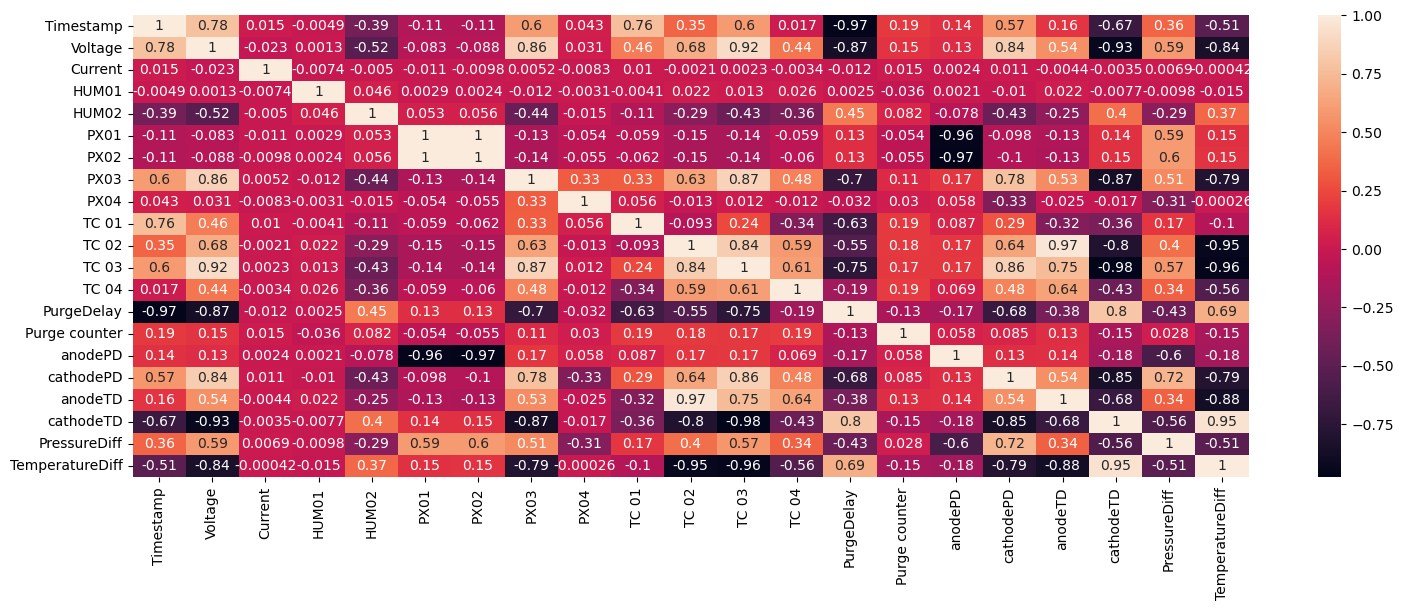

In [94]:
plt.figure(figsize=(18,6))
sns.heatmap(clean_purge_df.corr(),annot=True)

In [62]:
# Reading data (if 'purge_dataframe' is not available)
purge_dataframe = pd.read_csv('D:/dissertation/final_data.csv')

# Creating pressure difference column
purge_dataframe['anodePD'] = purge_dataframe['PX01'] - purge_dataframe['PX02']
purge_dataframe['cathodePD'] = purge_dataframe['PX03'] - purge_dataframe['PX04']

# Creating temperature difference column
purge_dataframe['anodeTD'] = purge_dataframe['TC 02'] - purge_dataframe['TC 01']
purge_dataframe['cathodeTD'] = purge_dataframe['TC 04'] - purge_dataframe['TC 03']

purge_dataframe['PressureDiff'] = purge_dataframe['cathodePD'] - purge_dataframe['anodePD']
purge_dataframe['TemperatureDiff'] = purge_dataframe['cathodeTD'] - purge_dataframe['anodeTD']


# Convert timestamp to datetime object and then to unix time (seconds since 1970-01-01)
purge_dataframe['Timestamp'] = pd.to_datetime(purge_dataframe['Timestamp'])
purge_dataframe['Timestamp'] = purge_dataframe['Timestamp'].apply(lambda x: x.timestamp())


# Drop constant or zero columns (if 'purge_dataframe' is not updated)
columns_to_drop = ['BPR01','SOL01','SOL02', 'BPR02', 'FPR01', 'TWV01', 'TWV02', 'TWV03','TC 05','TC 06','TC 07','TC 08', 'BPR01 SP', 'BPR02 SP','MFC02','MFC04', 'MFC02 SP', 'MFC04 SP', 'PurgeMode', 'PurgeWidth']
purge_dataframe = purge_dataframe.drop(columns_to_drop, axis=1)

print(purge_dataframe.head())

      Timestamp   Voltage     Current      HUM01      HUM02      PX01  \
0  1.689289e+09  0.469103  149.009886  80.020493  80.053078  1.576502   
1  1.689289e+09  0.469103  149.009886  80.020493  80.053078  1.576502   
2  1.689289e+09  0.469103  149.009886  80.020493  80.053078  1.576502   
3  1.689289e+09  0.469103  149.009886  80.020493  80.053078  1.576502   
4  1.689289e+09  0.469103  149.009886  80.020493  80.053078  1.576502   

       PX02      PX03      PX04      TC 01  ...      TC 03      TC 04  \
0  1.574971  1.526933  1.496417  23.876895  ...  43.101365  50.419066   
1  1.574971  1.526933  1.496417  23.876895  ...  43.101365  50.419066   
2  1.574971  1.526933  1.496417  23.876895  ...  43.101365  50.419066   
3  1.574971  1.526933  1.496417  23.876895  ...  43.101365  50.419066   
4  1.574971  1.526933  1.496417  23.876895  ...  43.101365  50.419066   

   PurgeDelay  Purge counter   anodePD  cathodePD   anodeTD  cathodeTD  \
0        30.0            0.0  0.001531   0.03051

<h3>Data cleaning

In [63]:
zero_vals=purge_dataframe.isnull().sum()    
print(zero_vals)

Timestamp          0
Voltage            0
Current            0
HUM01              0
HUM02              0
PX01               0
PX02               0
PX03               0
PX04               0
TC 01              0
TC 02              0
TC 03              0
TC 04              0
PurgeDelay         0
Purge counter      0
anodePD            0
cathodePD          0
anodeTD            0
cathodeTD          0
PressureDiff       0
TemperatureDiff    0
dtype: int64


Total number of outliers in Timestamp column: 0
Total number of outliers in Voltage column: 270
Total number of outliers in Current column: 2250
Total number of outliers in HUM01 column: 3617
Total number of outliers in HUM02 column: 10137
Total number of outliers in PX01 column: 6690
Total number of outliers in PX02 column: 6783
Total number of outliers in PX03 column: 2307
Total number of outliers in PX04 column: 4063
Total number of outliers in TC 01 column: 282
Total number of outliers in TC 02 column: 6076
Total number of outliers in TC 03 column: 0
Total number of outliers in TC 04 column: 0
Total number of outliers in PurgeDelay column: 0
Total number of outliers in Purge counter column: 3463
Total number of outliers in anodePD column: 4736
Total number of outliers in cathodePD column: 1083
Total number of outliers in anodeTD column: 6076
Total number of outliers in cathodeTD column: 0
Total number of outliers in PressureDiff column: 4646
Total number of outliers in TemperatureD

c:\Users\Sahil\miniconda3\envs\dissertation\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


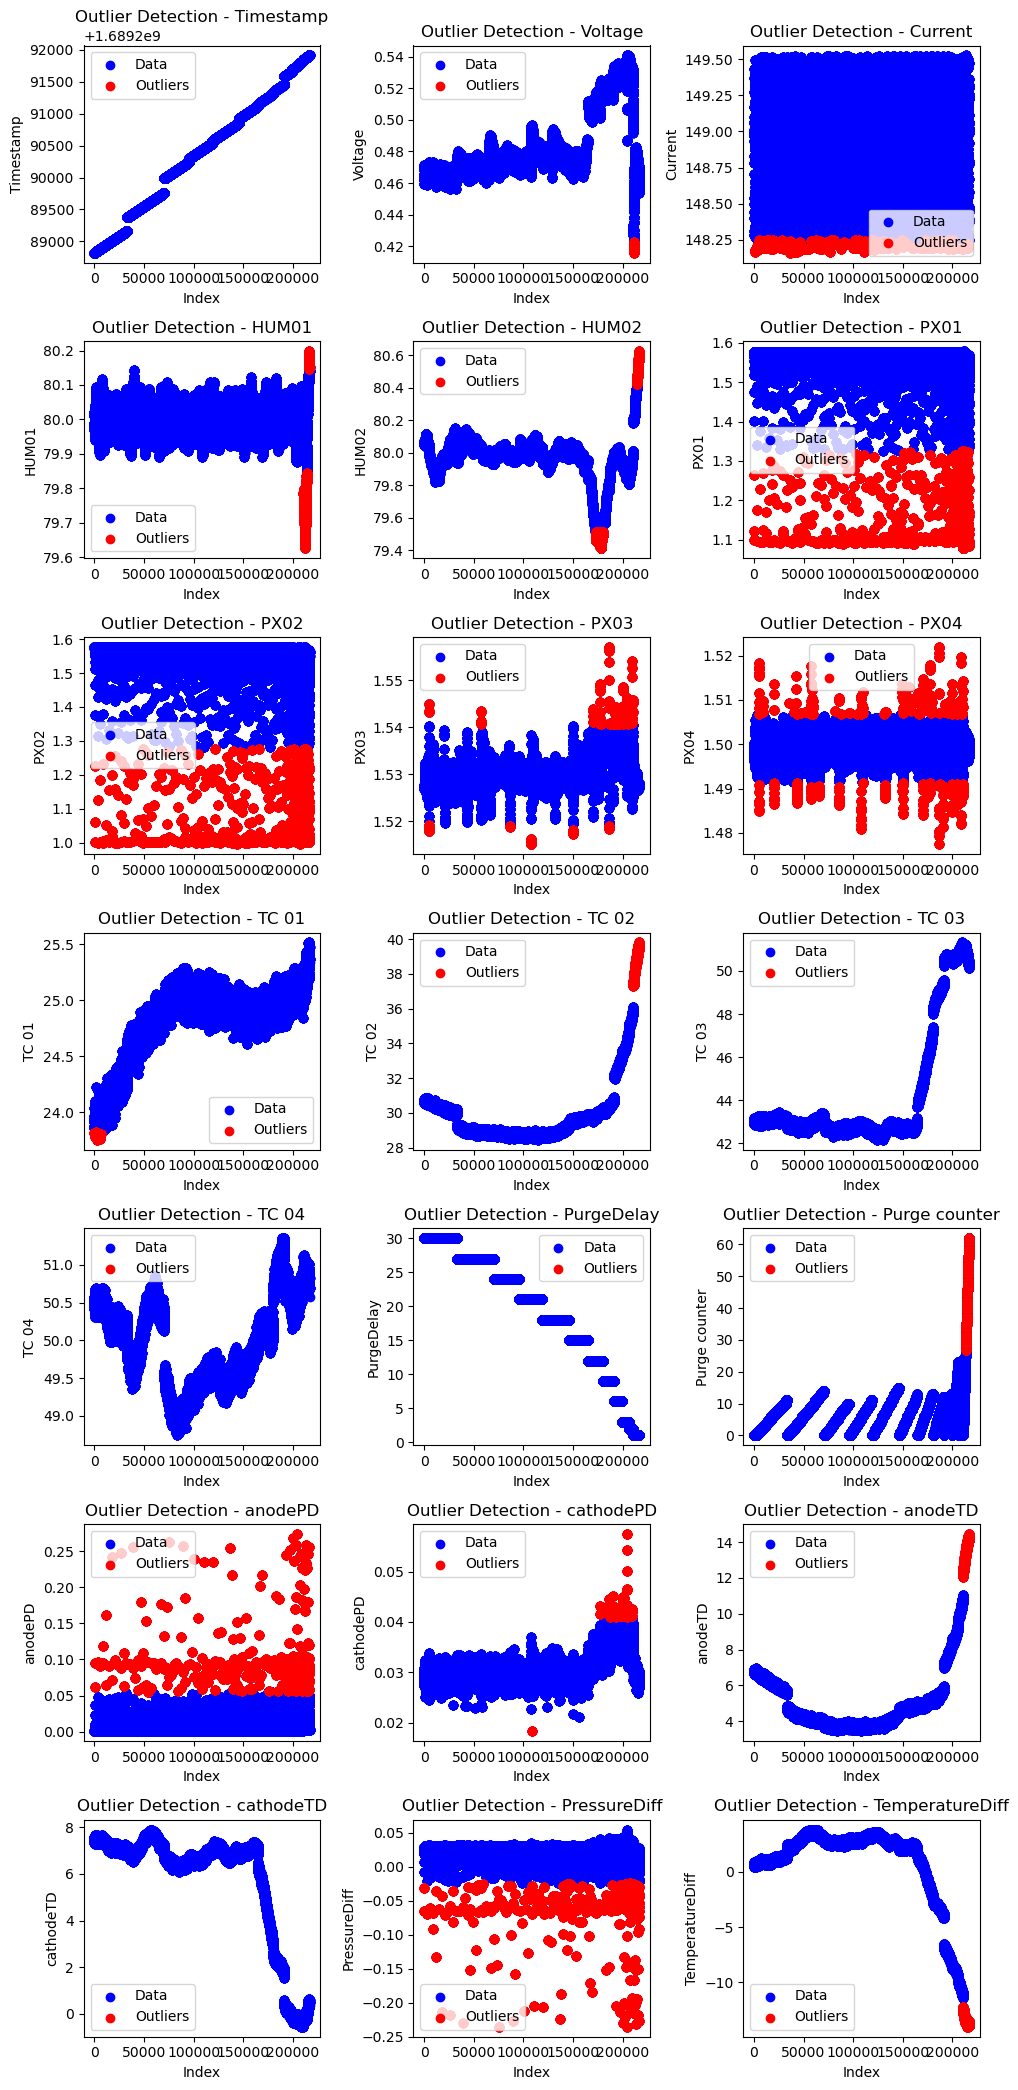

Shape before removing outliers: (216870, 21)
Shape after removing outliers: (191152, 21)


In [64]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Calculate the Z-score for each column in purge_dataframe
z_scores = np.abs(stats.zscore(purge_dataframe))

# Define a threshold for outlier detection (e.g., Z-score greater than 3)
threshold = 3

# Find the indices of outliers for each column
outlier_indices = np.where(z_scores > threshold)

# Get the row and column indices of the outliers
rows, cols = outlier_indices

# Number of plots per row and column
n_cols = 3
n_rows = (len(purge_dataframe.columns) + n_cols - 1) // n_cols

# Create the subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(10, n_rows*3))

# Flatten the axes for easy iteration
axs = axs.flatten()

for ax, column in zip(axs, purge_dataframe.columns):

    # Count the total number of outliers for each column
    total_outliers = len(rows[purge_dataframe.columns.get_loc(column) == cols])
  
    # Print the total number of outliers for each column
    print(f"Total number of outliers in {column} column: {total_outliers}")
    
    # Generate a plot to visualize the outliers for each column
    ax.scatter(purge_dataframe.index, purge_dataframe[column], color='b', label='Data')
    ax.scatter(purge_dataframe.index[rows[purge_dataframe.columns.get_loc(column) == cols]],
                purge_dataframe.iloc[rows[purge_dataframe.columns.get_loc(column) == cols]][column],
                color='r', label='Outliers')
    ax.set_xlabel('Index')
    ax.set_ylabel(column)
    ax.set_title(f'Outlier Detection - {column}')
    ax.legend()

# Remove unused subplots
if len(purge_dataframe.columns) < n_rows * n_cols:
    for ax in axs[len(purge_dataframe.columns):]:
        fig.delaxes(ax)

plt.tight_layout()
plt.show()

# Remove outliers from the DataFrame
clean_purge_df = purge_dataframe.drop(purge_dataframe.index[rows])

# Print the shape of the DataFrame before and after removing outliers
print("Shape before removing outliers:", purge_dataframe.shape)
print("Shape after removing outliers:", clean_purge_df.shape)


<h3>EDA

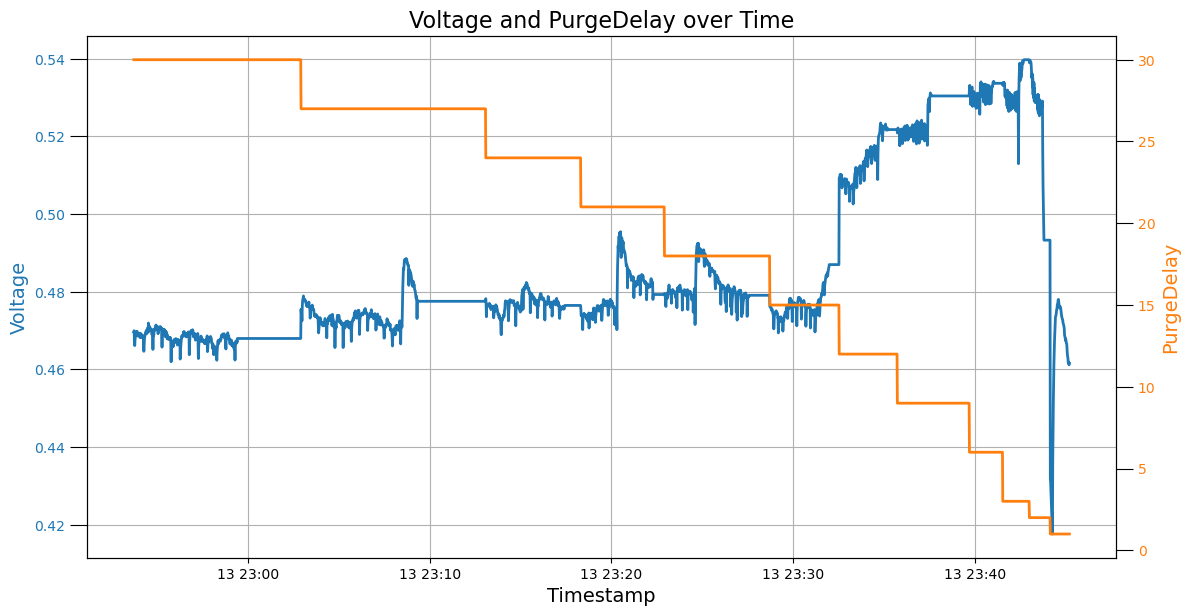

In [65]:
# Load the original data
purge_dataframe = pd.read_csv('D:/dissertation/final_data.csv',index_col='Timestamp',parse_dates=True)

# Drop constant or zero columns
columns_to_drop = ['BPR01','SOL01','SOL02', 'BPR02', 'FPR01', 'TWV01', 'TWV02', 'TWV03','HUM02','TC 05','TC 06','TC 07','TC 08', 'HUM01', 'BPR01 SP', 'BPR02 SP','MFC02','MFC04', 'MFC02 SP', 'MFC04 SP', 'PurgeMode', 'PurgeWidth']
purge_dataframe = purge_dataframe.drop(columns_to_drop, axis=1)

# Resampling data to have uniform time intervals
data_resampled = purge_dataframe.resample('S').mean()  # resample to 1-second intervals

# Forward-fill any missing values
data_resampled.fillna(method='ffill', inplace=True)

# Create two subplots with shared x-axis (time)
fig, ax1 = plt.subplots(figsize=(12,6))

# Plot 'Voltage' on the first y-axis
color = '#1f77b4'  # Adjust to your preference
ax1.set_xlabel('Timestamp', size=14)
ax1.set_ylabel('Voltage', color=color, size=14)
ax1.plot(data_resampled.index, data_resampled['Voltage'], color=color, linewidth=2)
ax1.tick_params(axis='y', labelcolor=color, size=12)
ax1.grid(True)

# Create a second y-axis for the same x-axis (time)
ax2 = ax1.twinx()

# Plot 'PurgeDelay' on the second y-axis
color = '#ff7f0e'  # Adjust to your preference
ax2.set_ylabel('PurgeDelay', color=color, size=14)
ax2.plot(data_resampled.index, data_resampled['PurgeDelay'], color=color, linewidth=2)
ax2.tick_params(axis='y', labelcolor=color, size=12)

# Improve layout and show the plot
fig.tight_layout()
plt.title('Voltage and PurgeDelay over Time', fontsize=16)
plt.show()


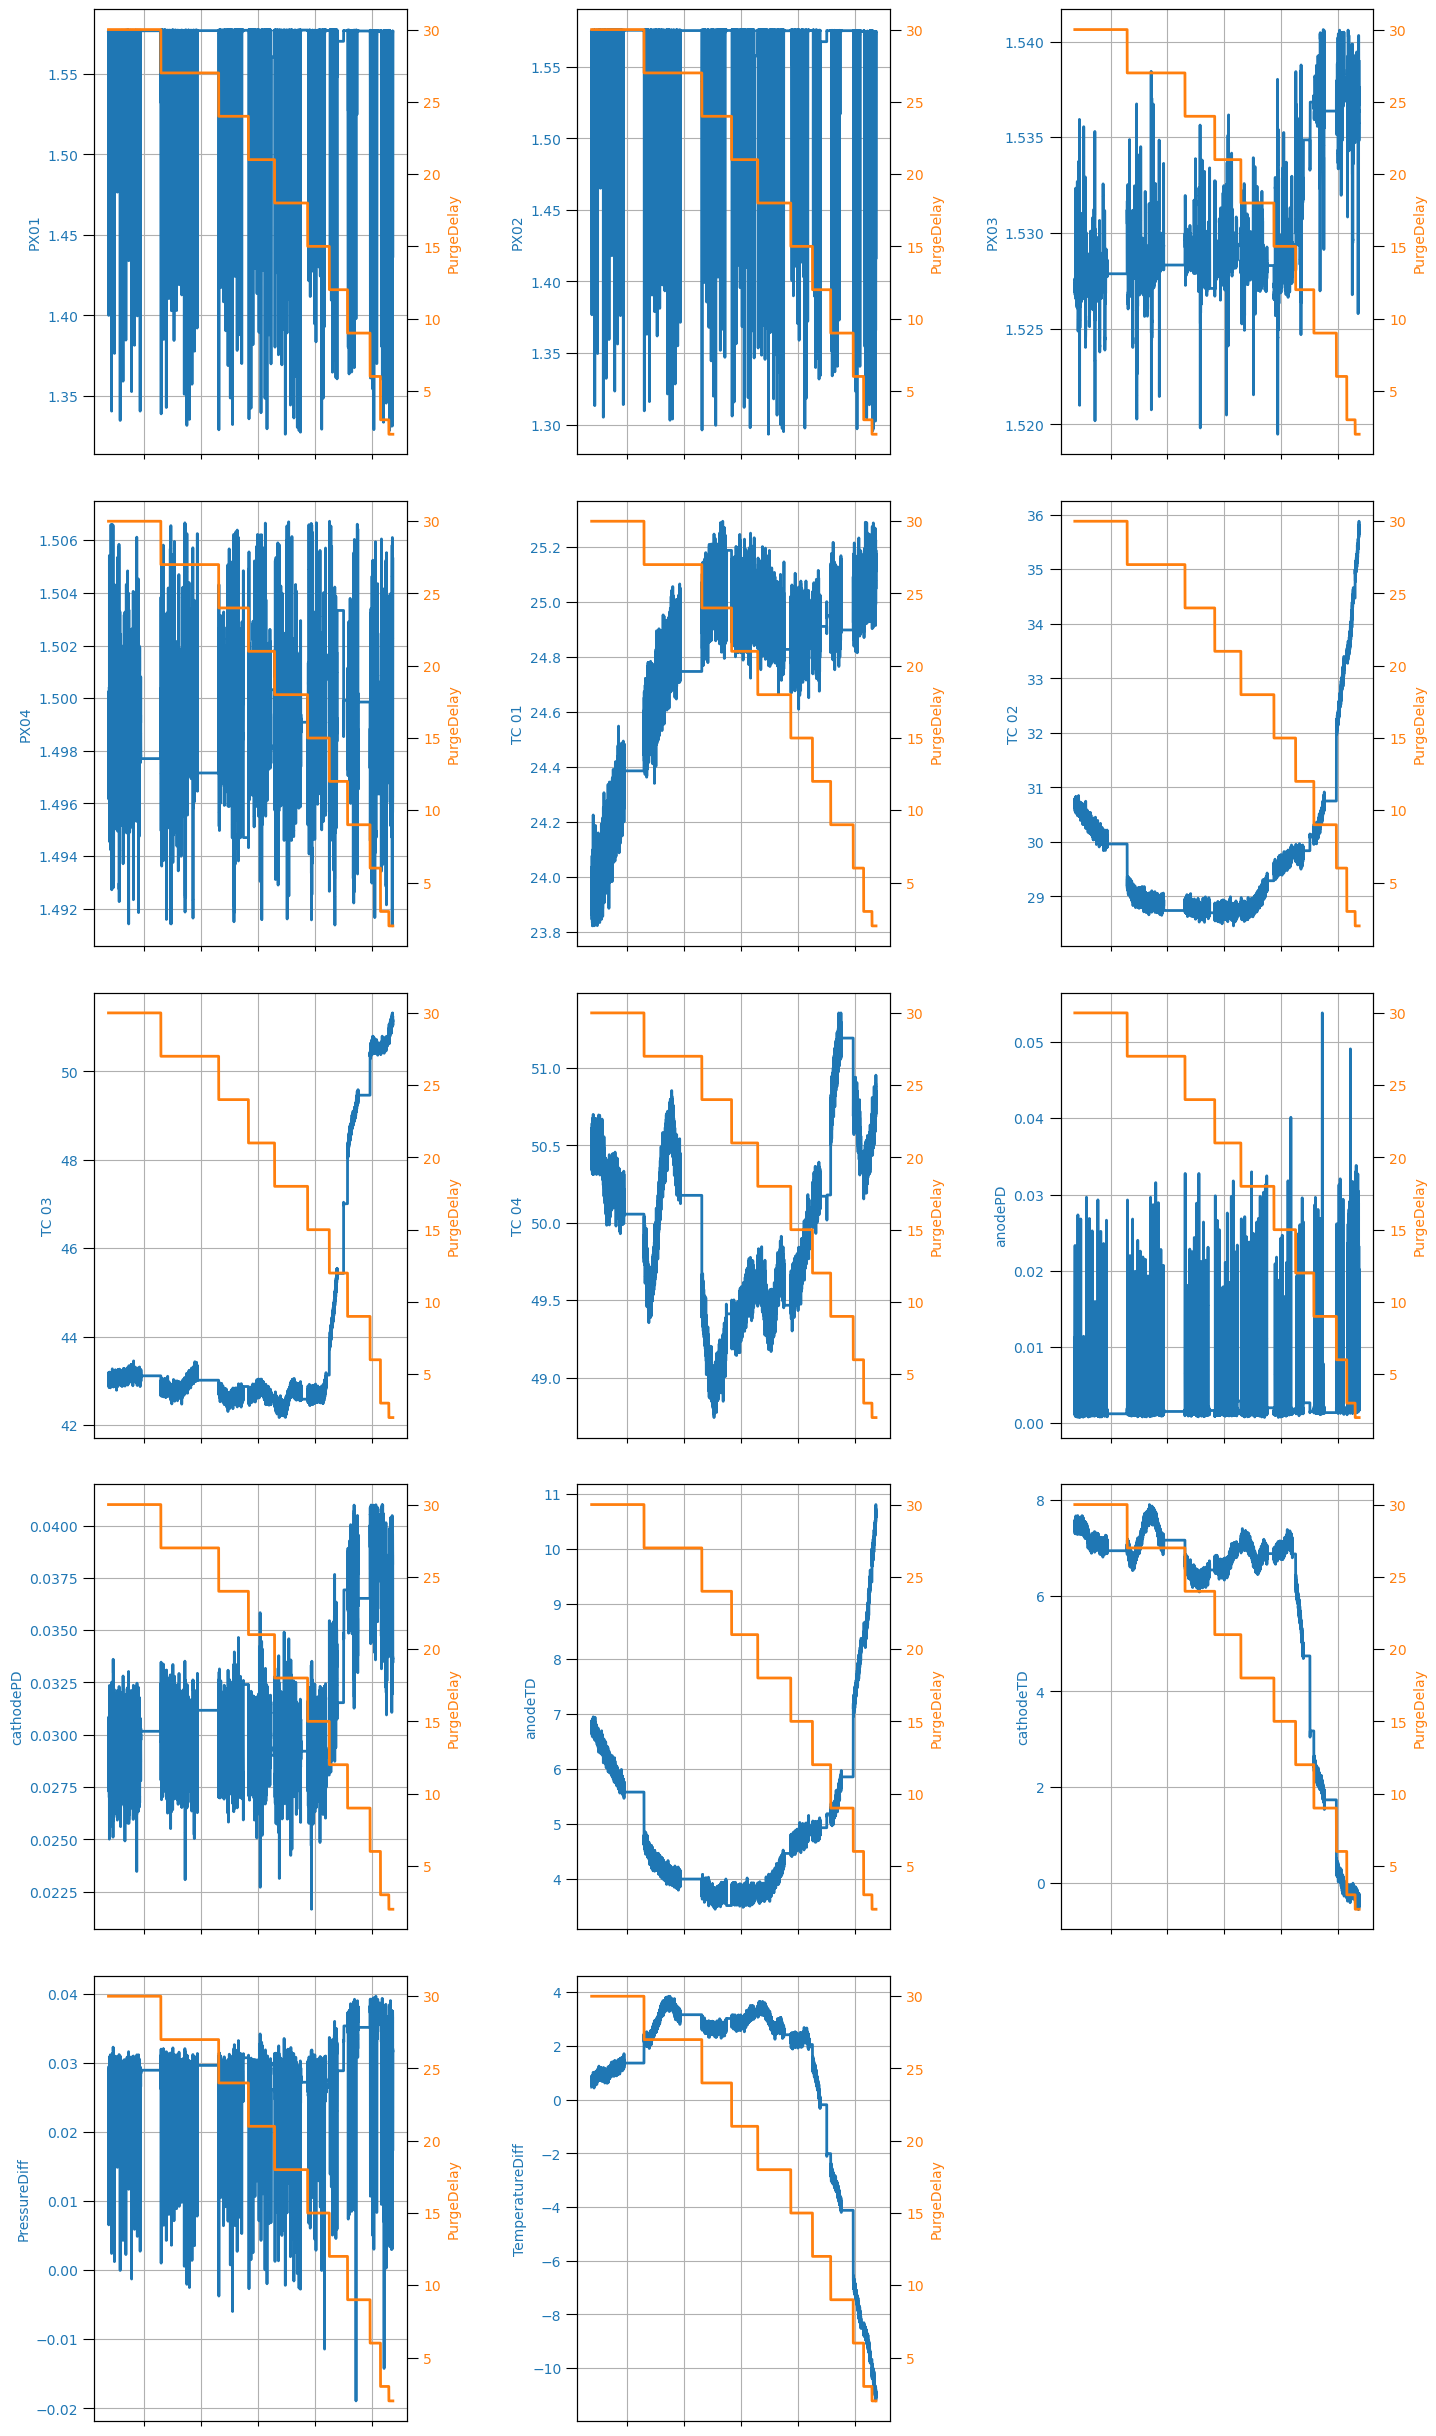

In [66]:


# Resampling data to have uniform time intervals
data_resampled = clean_purge_df.copy()
data_resampled['Timestamp'] = pd.to_datetime(data_resampled['Timestamp'], unit='s')
data_resampled.set_index('Timestamp', inplace=True)
data_resampled = data_resampled.resample('L').mean()  # 'L' for milliseconds
data_resampled = data_resampled.fillna(method='ffill')

# List of columns to be plotted
columns_to_plot = ['PX01', 'PX02', 'PX03', 'PX04', 'TC 01', 'TC 02', 'TC 03', 'TC 04', 'anodePD', 'cathodePD', 'anodeTD', 
                   'cathodeTD', 'PressureDiff', 'TemperatureDiff']

# Calculate number of rows needed for the grid
num_of_rows = math.ceil(len(columns_to_plot) / 3) # we want 3 columns

# Create figure and subplots
fig, axs = plt.subplots(num_of_rows, 3, figsize=(15, 5*num_of_rows)) # adjusting figure height based on number of rows
axs = axs.flatten()  # Flatten to 1D array for easier indexing

# Loop over all columns to create the plots
for i, column in enumerate(columns_to_plot):
    ax = axs[i]
    ax.set_ylabel(column, color='#1f77b4', size=10)
    ax.plot(data_resampled.index, data_resampled[column], color='#1f77b4', linewidth=2)
    ax.tick_params(axis='y', labelcolor='#1f77b4', size=8)
    ax.set_xticklabels([]) # hide x-axis labels
    ax.grid(True)

    ax2 = ax.twinx()
    ax2.set_ylabel('PurgeDelay', color='#ff7f0e', size=10)
    ax2.plot(data_resampled.index, data_resampled['PurgeDelay'], color='#ff7f0e', linewidth=2)
    ax2.tick_params(axis='y', labelcolor='#ff7f0e', size=8)

# If the total number of plots is not a multiple of 3, hide the remaining subplots
for i in range(len(columns_to_plot), len(axs)):
    axs[i].axis('off')

# Increase space between plots
plt.tight_layout(pad=3.0)
plt.show()


In [67]:
correlation_matrix = clean_purge_df.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                 Timestamp   Voltage   Current     HUM01     HUM02      PX01  \
Timestamp         1.000000  0.777882  0.015253 -0.004931 -0.385834 -0.107827   
Voltage           0.777882  1.000000 -0.023454  0.001327 -0.517501 -0.083228   
Current           0.015253 -0.023454  1.000000 -0.007365 -0.005034 -0.010652   
HUM01            -0.004931  0.001327 -0.007365  1.000000  0.046114  0.002932   
HUM02            -0.385834 -0.517501 -0.005034  0.046114  1.000000  0.053236   
PX01             -0.107827 -0.083228 -0.010652  0.002932  0.053236  1.000000   
PX02             -0.112129 -0.088243 -0.009790  0.002388  0.056194  0.999494   
PX03              0.598324  0.862048  0.005179 -0.012319 -0.442839 -0.134354   
PX04              0.042882  0.031206 -0.008279 -0.003090 -0.014949 -0.054474   
TC 01             0.764865  0.463551  0.010305 -0.004106 -0.107519 -0.059083   
TC 02             0.352170  0.678956 -0.002123  0.022327 -0.293022 -0.147746   
TC 03             0.

<h3>Model 1

In [68]:
clean_purge_df.head

<bound method NDFrame.head of            Timestamp   Voltage     Current      HUM01      HUM02      PX01  \
0       1.689289e+09  0.469103  149.009886  80.020493  80.053078  1.576502   
1       1.689289e+09  0.469103  149.009886  80.020493  80.053078  1.576502   
2       1.689289e+09  0.469103  149.009886  80.020493  80.053078  1.576502   
3       1.689289e+09  0.469103  149.009886  80.020493  80.053078  1.576502   
4       1.689289e+09  0.469103  149.009886  80.020493  80.053078  1.576502   
...              ...       ...         ...        ...        ...       ...   
210289  1.689292e+09  0.530264  148.998428  79.971451  80.003983  1.576300   
210290  1.689292e+09  0.530264  148.998428  79.971451  80.003983  1.576300   
210291  1.689292e+09  0.530264  148.998428  79.971451  80.003983  1.576300   
210292  1.689292e+09  0.530264  148.998428  79.971451  80.003983  1.576300   
210293  1.689292e+09  0.530264  148.998428  79.971451  80.003983  1.576300   

            PX02      PX03      P

In [69]:
data_test1=clean_purge_df[['Voltage','PurgeDelay']]
data_test1.head

<bound method NDFrame.head of          Voltage  PurgeDelay
0       0.469103        30.0
1       0.469103        30.0
2       0.469103        30.0
3       0.469103        30.0
4       0.469103        30.0
...          ...         ...
210289  0.530264         2.0
210290  0.530264         2.0
210291  0.530264         2.0
210292  0.530264         2.0
210293  0.530264         2.0

[191152 rows x 2 columns]>

In [70]:
encoder1 = LabelEncoder()

# Reshape the input data
data_test1.loc[:, 'PurgeDelay'] = encoder1.fit_transform(data_test1['PurgeDelay'])

data_test1

,Voltage,PurgeDelay
0,0.469103,10.0
1,0.469103,10.0
2,0.469103,10.0
3,0.469103,10.0
4,0.469103,10.0
...,...,...
210289,0.530264,0.0
210290,0.530264,0.0
210291,0.530264,0.0
210292,0.530264,0.0


In [71]:

# Split the DataFrame into features (X) and target (y)
X1 = data_test1["Voltage"]
y1 = data_test1["PurgeDelay"]


In [72]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, stratify=y1)
scaler1 = MinMaxScaler()
# Reshape the input data
X_train_reshaped1 = X_train1.values.reshape(-1, 1)
X_test_reshaped1 = X_test1.values.reshape(-1, 1)

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled1 = scaler1.fit_transform(X_train_reshaped1)
X_test_scaled1 = scaler1.transform(X_test_reshaped1)
print(np.unique(y_train1))
y_train_categorical1 = to_categorical(y_train1, num_classes=12)
y_test_categorical1 = to_categorical(y_test1, num_classes=12)
# Reshape data to be compatible with LSTM input
x_train_lstm1 = X_train_scaled1.reshape((X_train_scaled1.shape[0], 1, X_train_scaled1.shape[1]))
x_test_lstm1 = X_test_scaled1.reshape((X_test_scaled1.shape[0], 1, X_test_scaled1.shape[1]))

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


In [82]:

model1 = Sequential([
    LSTM(128, input_shape=(x_train_lstm1.shape[1], x_train_lstm1.shape[2]), activation='tanh', return_sequences=True),
    Dropout(0.2),
    LSTM(64, activation='tanh'),
    Dense(12, activation='softmax')
])
optimizer1 = tf.keras.optimizers.Adam(learning_rate=0.001)
model1.compile(optimizer=optimizer1, loss='categorical_crossentropy', metrics=['accuracy'])


#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min', restore_best_weights=True)

early_stop1 = EarlyStopping(monitor='val_loss', patience=15, verbose=1, mode='min', restore_best_weights=True)

hist1 = model1.fit(x_train_lstm1, y_train_categorical1, epochs=50, validation_split=0.35, batch_size=128,
          callbacks=[early_stop1], validation_data=(x_test_lstm1, y_test_categorical1))


Epoch 1/50
1046/1046 [==============================] - 9s 7ms/step - loss: 1.4075 - accuracy: 0.4644 - val_loss: 1.0984 - val_accuracy: 0.5862
Epoch 2/50
1046/1046 [==============================] - 7s 7ms/step - loss: 1.0716 - accuracy: 0.5806 - val_loss: 1.0366 - val_accuracy: 0.5918
Epoch 3/50
1046/1046 [==============================] - 7s 7ms/step - loss: 1.0352 - accuracy: 0.5822 - val_loss: 1.0209 - val_accuracy: 0.5808
Epoch 4/50
1046/1046 [==============================] - 6s 6ms/step - loss: 1.0207 - accuracy: 0.5855 - val_loss: 1.0076 - val_accuracy: 0.5923
Epoch 5/50
1046/1046 [==============================] - 6s 6ms/step - loss: 1.0102 - accuracy: 0.5954 - val_loss: 0.9962 - val_accuracy: 0.6044
Epoch 6/50
1046/1046 [==============================] - 6s 6ms/step - loss: 1.0008 - accuracy: 0.6033 - val_loss: 0.9908 - val_accuracy: 0.6086
Epoch 7/50
1046/1046 [==============================] - 6s 6ms/step - loss: 0.9946 - accuracy: 0.6076 - val_loss: 0.9793 - val_accuracy:

In [83]:
unique1, counts1 = np.unique(y_train1, return_counts=True)
print(dict(zip(unique1, counts1)))
# Assuming y_pred are the predicted classes
y_pred1 = np.argmax(model1.predict(x_test_lstm1), axis=-1)

# Inverse transform the label encoded 'PurgeDelay'
y_pred_inverse1 = encoder1.inverse_transform(y_pred1)

# Inverse transform the scaled 'Voltage'
X_test_inverse1 = scaler1.inverse_transform(X_test_reshaped1)


{0.0: 2365, 1.0: 3544, 2.0: 4761, 3.0: 6982, 4.0: 5273, 5.0: 12741, 6.0: 18192, 7.0: 15607, 8.0: 17154, 9.0: 25058, 10.0: 22129}
1793/1793 [==============================] - 2s 1ms/step


   1/1793 [..............................] - ETA: 1:10 - loss: 0.9374 - accuracy: 0.6250

1793/1793 [==============================] - 2s 1ms/step - loss: 0.9556 - accuracy: 0.6165
0.9556341171264648 0.6165382266044617


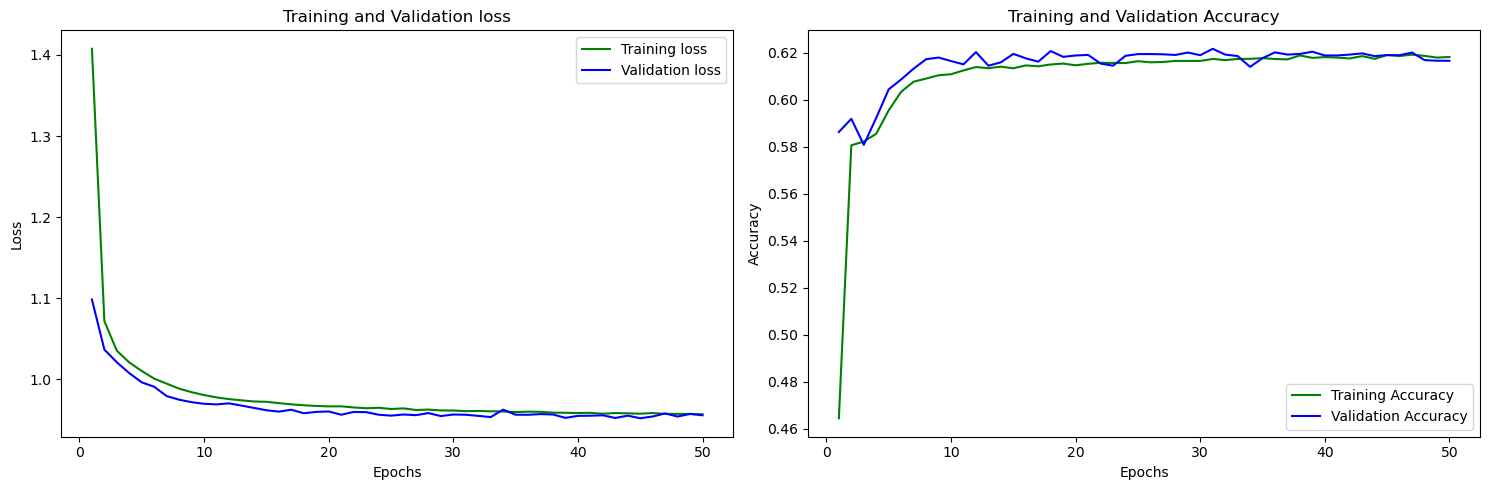

In [84]:
loss1, accuracy1 = model1.evaluate(x_test_lstm1, y_test_categorical1)
print(loss1,accuracy1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Training and validation loss plot
loss_train1 = hist1.history['loss']
loss_val1 = hist1.history['val_loss']
epochs1 = range(1, 51)
ax1.plot(epochs1, loss_train1, 'g', label='Training loss')
ax1.plot(epochs1, loss_val1, 'b', label='Validation loss')
ax1.set_title('Training and Validation loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

# Training and validation accuracy plot
loss_accu1 = hist1.history['accuracy']
loss_val_accu1 = hist1.history['val_accuracy']
ax2.plot(epochs1, loss_accu1, 'g', label='Training Accuracy')
ax2.plot(epochs1, loss_val_accu1, 'b', label='Validation Accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.tight_layout()
plt.show()
loss1, accuracy1 = model1.evaluate(x_test_lstm1, y_test_categorical1)
print(loss1,accuracy1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Training and validation loss plot
loss_train1 = hist1.history['loss']
loss_val1 = hist1.history['val_loss']
epochs1 = range(1, 51)
ax1.plot(epochs1, loss_train1, 'g', label='Training loss')
ax1.plot(epochs1, loss_val1, 'b', label='Validation loss')
ax1.set_title('Training and Validation loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

# Training and validation accuracy plot
loss_accu1 = hist1.history['accuracy']
loss_val_accu1 = hist1.history['val_accuracy']
ax2.plot(epochs1, loss_accu1, 'g', label='Training Accuracy')
ax2.plot(epochs1, loss_val_accu1, 'b', label='Validation Accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.tight_layout()
plt.show()


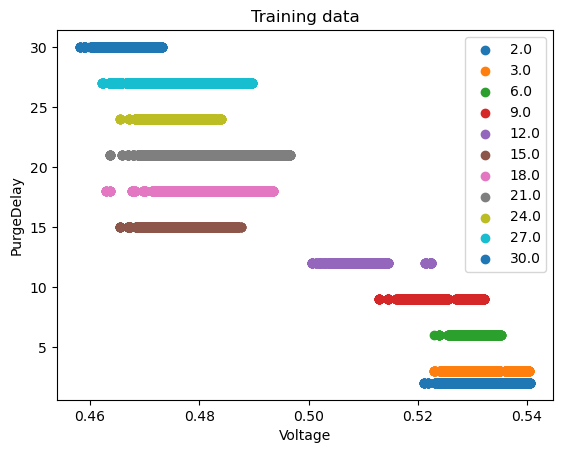

In [85]:
# Get back original integer labels
y_train_int1 = np.argmax(y_train_categorical1, axis=-1)

# Inverse transform integers
y_train_orig1 = encoder1.inverse_transform(y_train_int1)

# Inverse transform input data 
X_train_orig1 = scaler1.inverse_transform(X_train_scaled1.reshape(-1, 1)).reshape(X_train_scaled1.shape)

# Scatter plot
plt.figure()
for c in np.unique(y_train_orig1):
    ix = np.where(y_train_orig1 == c)
    plt.scatter(X_train_orig1[ix, 0], [c] * len(ix[0]), label=c) 
plt.legend()
plt.xlabel('Voltage')
plt.ylabel('PurgeDelay')
plt.title("Training data")
plt.show()


<h4>Model 2

In [73]:
data_test2 = clean_purge_df[['Timestamp','Voltage','PurgeDelay']]

# Encoding 'PurgeDelay'
encoder2 = LabelEncoder()
data_test2.loc[:, 'PurgeDelay'] = encoder2.fit_transform(data_test2['PurgeDelay'])

# Splitting into features and target
X2 = data_test2[["Timestamp", "Voltage"]].values
y2 = data_test2["PurgeDelay"].values

# Defining lookback period and creating sequences
lookback2 = 3
X_seq2 = []
y_seq2 = []

for i in range(len(X2) - lookback2):
    X_seq2.append(X2[i:i+lookback2])
    y_seq2.append(y2[i+lookback2])

# Convert to numpy arrays
X_seq2 = np.array(X_seq2)
y_seq2 = np.array(y_seq2)

# Get unique classes and their counts
unique2, counts2 = np.unique(y_seq2, return_counts=True)

# Find the class with the minimum count
min_class2 = min(counts2)

# Initialize arrays to store stratified data
X_stratified2 = np.empty((0, lookback2, X2.shape[1]))
y_stratified2 = np.empty((0,))

# Loop over classes
for cls in unique2:
    # Get indices of instances of this class
    indices2 = np.where(y_seq2 == cls)[0]

    # If the number of instances is more than the minimum class count, then undersample it
    if len(indices2) > min_class2:
        indices2 = np.random.choice(indices2, min_class2, replace=False)

    # Get the instances of this class
    X_cls2 = X_seq2[indices2]
    y_cls2 = y_seq2[indices2]

    # Append to stratified data
    X_stratified2 = np.append(X_stratified2, X_cls2, axis=0)
    y_stratified2 = np.append(y_stratified2, y_cls2, axis=0)

# Initialize stratified K-fold
n_folds2 = 5
skf2 = StratifiedKFold(n_splits=n_folds2, shuffle=True, random_state=42)

# Scaling 'Timestamp' and 'Voltage' for the hold-out test set
scaler2 = MinMaxScaler()
X_holdout_test_scaled2 = scaler2.fit_transform(X_stratified2.reshape(-1, X2.shape[-1])).reshape(X_stratified2.shape)

# One-hot encoding 'PurgeDelay' for the hold-out test set
y_holdout_test_categorical2 = to_categorical(y_stratified2, num_classes=len(unique2))

# Initialize results
results2 = []
predictions2 = []  # List to store predictions for each fold

# Loop over the folds
for fold, (train_val, test) in enumerate(skf2.split(X_stratified2, y_stratified2)):
    print(f"Fold {fold + 1}:")
    # Split into training and validation sets
    X_train_val2, X_test2 = X_stratified2[train_val], X_stratified2[test]
    y_train_val2, y_test2 = y_stratified2[train_val], y_stratified2[test]

    # Further split training and validation sets
    X_train2, X_val2, y_train2, y_val2 = train_test_split(X_train_val2, y_train_val2, test_size=0.2, stratify=y_train_val2, random_state=42)

    # Apply SMOTE if imbalanced in training data
    class_dist2 = pd.Series(y_train2).value_counts()
    if class_dist2.min() / class_dist2.max() < 0.5:
        smote2 = SMOTE(random_state=42)
        X_train2, y_train2 = smote2.fit_resample(X_train2.reshape(X_train2.shape[0], -1), y_train2)
        X_train2 = X_train2.reshape(-1, lookback2, X2.shape[1])

    # Scaling 'Timestamp' and 'Voltage'
    X_train_scaled2 = scaler2.transform(X_train2.reshape(-1, X_train2.shape[-1])).reshape(X_train2.shape)
    X_val_scaled2 = scaler2.transform(X_val2.reshape(-1, X_val2.shape[-1])).reshape(X_val2.shape)
    X_test_scaled2 = scaler2.transform(X_test2.reshape(-1, X_test2.shape[-1])).reshape(X_test2.shape)

    # One-hot encoding 'PurgeDelay'
    y_train_categorical2 = to_categorical(y_train2, num_classes=len(unique2))
    y_val_categorical2 = to_categorical(y_val2, num_classes=len(unique2))
    y_test_categorical2 = to_categorical(y_test2, num_classes=len(unique2))

    # LSTM model with Dropout and L2 regularization
    model2 = Sequential([
  LSTM(32, return_sequences=True,  
      kernel_regularizer=l1_l2(l1=0.01, l2=0.15),
      input_shape=(X_train_scaled2.shape[1], X_train_scaled2.shape[2])),
  BatchNormalization(),
  Dropout(0.7), 
  LSTM(32, kernel_regularizer=l1_l2(l1=0.01, l2=0.15)),
  BatchNormalization(),
  Dropout(0.7),
  Dense(len(unique2), activation='softmax', kernel_regularizer=l1_l2(l1=0.01, l2=0.15))
])


    # Compile the model
    optimizer2 = Adam(learning_rate=0.001)  # Decreased learning rate
    model2.compile(optimizer=optimizer2, loss='categorical_crossentropy', metrics=['accuracy'])

    # Early stopping and learning rate scheduler
    early_stop2 = EarlyStopping(monitor='val_loss', patience=30, verbose=1, mode='min', restore_best_weights=True)
    lr_scheduler2 = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=20, verbose=1, mode='min', min_lr=1e-6)

    # Train the model
    history2 = model2.fit(X_train_scaled2, y_train_categorical2, epochs=20,  # Increased number of epochs
                        validation_data=(X_val_scaled2, y_val_categorical2),
                        batch_size=64, callbacks=[early_stop2, lr_scheduler2], verbose=1)



    # Evaluate the model on the validation set
    score_val2 = model2.evaluate(X_val_scaled2, y_val_categorical2, verbose=1)
    print('Validation loss:', score_val2[0])
    print('Validation accuracy:', score_val2[1])

    # Predicted classes for the validation set
    y_pred_val2 = np.argmax(model2.predict(X_val_scaled2), axis=-1)

    # Calculate precision, recall, f1-score for the validation set
    precision_val2 = precision_score(y_val2, y_pred_val2, average='macro')
    recall_val2 = recall_score(y_val2, y_pred_val2, average='macro')
    f1_val2 = f1_score(y_val2, y_pred_val2, average='macro')

    print('Precision (validation set):', precision_val2)
    print('Recall (validation set):', recall_val2)
    print('F1-score (validation set):', f1_val2)

    # Append validation set results to the results list
    results2.append({
        'fold': fold + 1,
        'val_loss': score_val2[0],
        'val_accuracy': score_val2[1],
        'precision': precision_val2,
        'recall': recall_val2,
        'f1': f1_val2,
    })

    # Predict classes for the validation set and the hold-out test set
    y_pred_val2 = np.argmax(model2.predict(X_val_scaled2), axis=-1)
    y_pred_holdout2 = np.argmax(model2.predict(X_holdout_test_scaled2), axis=-1)

    # Inverse transform the predictions to get the original class labels
    y_pred_val_original2 = encoder2.inverse_transform(y_pred_val2)
    y_pred_holdout_original2 = encoder2.inverse_transform(y_pred_holdout2)

    # Store the predictions for each fold
    predictions2.append({
        'fold': fold + 1,
        'val_predictions': y_pred_val_original2,
        'holdout_predictions': y_pred_holdout_original2,
    })

# Convert results and predictions to DataFrames
results_df2 = pd.DataFrame(results2)
predictions_df2 = pd.DataFrame(predictions2)

print('Results:')
print(results_df2)
print('\nPredictions:')
print(predictions_df2)

Fold 1:
Epoch 1/20
372/372 [==============================] - 10s 9ms/step - loss: 6.3001 - accuracy: 0.2636 - val_loss: 2.9733 - val_accuracy: 0.1964 - lr: 0.0010
Epoch 2/20
372/372 [==============================] - 2s 6ms/step - loss: 2.0913 - accuracy: 0.3912 - val_loss: 2.0121 - val_accuracy: 0.5895 - lr: 0.0010
Epoch 3/20
372/372 [==============================] - 2s 5ms/step - loss: 1.9081 - accuracy: 0.4572 - val_loss: 1.7795 - val_accuracy: 0.5887 - lr: 0.0010
Epoch 4/20
372/372 [==============================] - 2s 5ms/step - loss: 1.8090 - accuracy: 0.4945 - val_loss: 1.6029 - val_accuracy: 0.6476 - lr: 0.0010
Epoch 5/20
372/372 [==============================] - 2s 5ms/step - loss: 1.7290 - accuracy: 0.5287 - val_loss: 1.5839 - val_accuracy: 0.6173 - lr: 0.0010
Epoch 6/20
372/372 [==============================] - 2s 5ms/step - loss: 1.6657 - accuracy: 0.5350 - val_loss: 1.5290 - val_accuracy: 0.6886 - lr: 0.0010
Epoch 7/20
372/372 [==============================] - 2s 6ms/

c:\Users\Sahil\miniconda3\envs\dissertation\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1162/1162 [==============================] - 1s 1ms/step
Fold 3:
Epoch 1/20
372/372 [==============================] - 4s 4ms/step - loss: 6.0715 - accuracy: 0.2757 - val_loss: 2.9670 - val_accuracy: 0.2173 - lr: 0.0010
Epoch 2/20
372/372 [==============================] - 1s 3ms/step - loss: 2.0739 - accuracy: 0.4050 - val_loss: 1.9961 - val_accuracy: 0.5858 - lr: 0.0010
Epoch 3/20
372/372 [==============================] - 1s 3ms/step - loss: 1.8886 - accuracy: 0.4709 - val_loss: 1.7405 - val_accuracy: 0.5912 - lr: 0.0010
Epoch 4/20
372/372 [==============================] - 1s 3ms/step - loss: 1.7924 - accuracy: 0.5032 - val_loss: 1.6558 - val_accuracy: 0.6819 - lr: 0.0010
Epoch 5/20
372/372 [==============================] - 1s 3ms/step - loss: 1.7095 - accuracy: 0.5372 - val_loss: 1.4965 - val_accuracy: 0.6104 - lr: 0.0010
Epoch 6/20
372/372 [==============================] - 1s 3ms/step - loss: 1.6508 - accuracy: 0.5455 - val_loss: 1.5684 - val_accuracy: 0.5152 - lr: 0.0010
Epoch

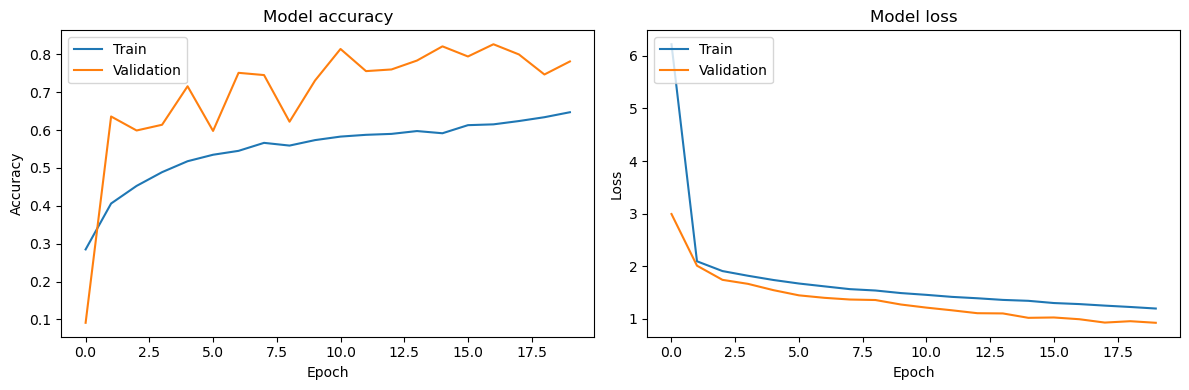

In [74]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


In [75]:
# Evaluate the model on the test set
score_test2 = model2.evaluate(X_test_scaled2, y_test_categorical2, verbose=1)
print('Test loss:', score_test2[0])
print('Test accuracy:', score_test2[1])

# Predicted classes for the test set
y_pred_test2 = np.argmax(model2.predict(X_test_scaled2), axis=-1)

# Calculate precision, recall, f1-score for the test set
precision_test2 = precision_score(y_test2, y_pred_test2, average='macro')
recall_test2 = recall_score(y_test2, y_pred_test2, average='macro')
f1_test2 = f1_score(y_test2, y_pred_test2, average='macro')

print('Precision (test set):', precision_test2)
print('Recall (test set):', recall_test2)
print('F1-score (test set):', f1_test2)

# Append test set results to the results list
results2.append({
    'fold': fold + 1,
    'test_loss': score_test2[0],
    'test_accuracy': score_test2[1],
    'precision': precision_test2,
    'recall': recall_test2,
    'f1': f1_test2,
})


233/233 [==============================] - 0s 1ms/step - loss: 0.9281 - accuracy: 0.7787
Test loss: 0.9281339645385742
Test accuracy: 0.7786896228790283
233/233 [==============================] - 0s 1ms/step
Precision (test set): 0.8076594307599098
Recall (test set): 0.778680493295878
F1-score (test set): 0.7698951108661067


Text(0.5, 1.0, 'Training data')

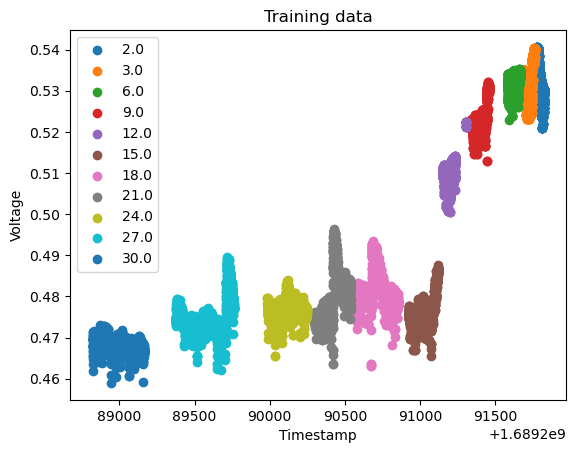

In [76]:
# Get back original integer labels
y_train_int = np.argmax(y_train_categorical2, axis=-1) 

# Inverse transform integers
y_train_orig = encoder2.inverse_transform(y_train_int)

# Inverse transform input data 
X_train_orig = scaler2.inverse_transform(X_train_scaled2.reshape(-1, 2)).reshape(X_train_scaled2.shape)

# Scatter plot
plt.figure()
for c in np.unique(y_train_orig):
    ix = np.where(y_train_orig == c)
    plt.scatter(X_train_orig[ix, 0, 0], X_train_orig[ix, 0, 1], label=c) 
plt.legend()
plt.xlabel('Timestamp')
plt.ylabel('Voltage')
plt.title("Training data")

In [90]:
# import numpy as np
# import pandas as pd

# # Step 1: Generate the sine wave
# frequency = 0.1  # Adjust the frequency as needed
# amplitude = 10.0  # Adjust the amplitude as needed
# time = np.arange(len(clean_purge_df))
# sine_wave = amplitude * np.sin(2 * np.pi * frequency * time)

# clean_purge_df_pred=clean_purge_df.copy()
# # Step 2: Add the sine wave to the entire 'Voltage' column in clean_purge_df
# clean_purge_df_pred['Voltage'] = clean_purge_df_pred['Voltage'] + sine_wave

In [ ]:
# creating a sine wave
sin_wave = np.sin(np.linspace(-np.pi, np.pi, len(clean_purge_df)))

# adding the sine wave to the 'Voltage' column
clean_purge_df_pred=clean_purge_df.copy()
clean_purge_df_pred['Voltage'] += sine_wave


In [ ]:
clean_purge_df_pred.head()

In [92]:
# make predictions for the holdout set
y_pred_holdout2 = np.argmax(model2.predict(X_holdout_test_scaled2), axis=-1)

# Inverse transform the predictions to get the original class labels
y_pred_holdout_original2 = encoder2.inverse_transform(y_pred_holdout2)


1162/1162 [==============================] - 1s 998us/step


In [93]:
# Preprocess the 'Voltage' column to match the scaling used during training
X_test_scaled2 = scaler2.transform(clean_purge_df[['Timestamp', 'Voltage']].values)

# Create sequences for test data similar to how it was done for training data
X_seq_test2 = []
for i in range(len(X_test_scaled2) - lookback2 + 1):
    X_seq_test2.append(X_test_scaled2[i:i + lookback2])
X_seq_test2 = np.array(X_seq_test2)

# Predict classes for the test data
y_pred_test2 = np.argmax(model2.predict(X_seq_test2), axis=-1)

# Inverse transform the predictions to get the original class labels
y_pred_test_original2 = encoder2.inverse_transform(y_pred_test2)

# Add the predictions to the DataFrame
clean_purge_df['PurgeDelay_Predicted_model2'] = np.nan  # Initialize the column with NaNs
clean_purge_df['PurgeDelay_Predicted_model2'].iloc[lookback2 - 1:] = y_pred_test_original2


5974/5974 [==============================] - 6s 930us/step


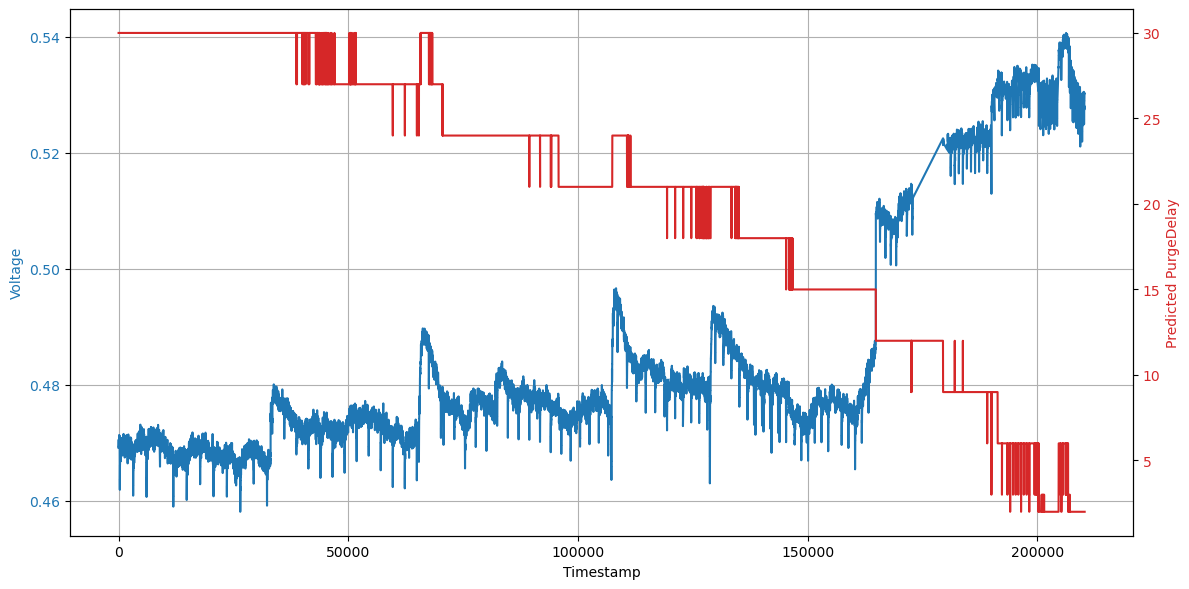

In [94]:

# Create two subplots with shared x-axis (time)
fig, ax1 = plt.subplots(figsize=(12,6))

# Plot 'Voltage' on the first y-axis
color = 'tab:blue'
ax1.set_xlabel('Timestamp')
ax1.set_ylabel('Voltage', color=color)
ax1.plot(clean_purge_df.index, clean_purge_df['Voltage'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax1.grid(True)

# Create a second y-axis for the same x-axis (time)
ax2 = ax1.twinx()

# We already handled the x-label with ax1
ax2.set_ylabel('Predicted PurgeDelay', color='tab:red')  # we already handled the x-label with ax1
ax2.plot(clean_purge_df.index, clean_purge_df['PurgeDelay_Predicted_model2'], color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


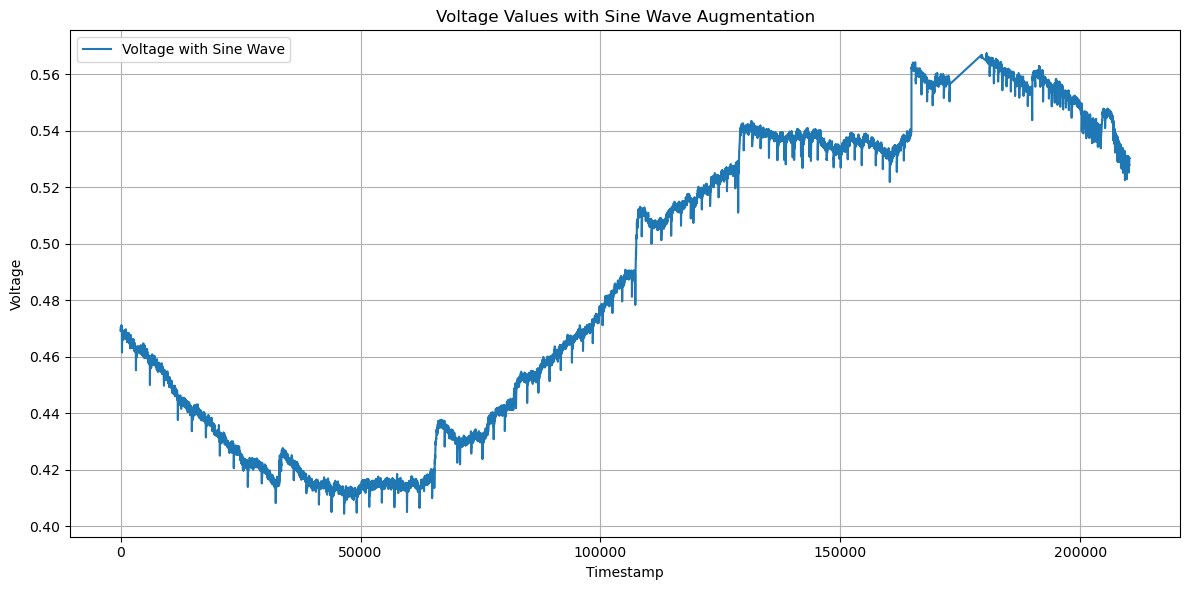

In [89]:
scaled_sin_wave = 0.06 * np.sin(np.linspace(-np.pi, np.pi, len(clean_purge_df)))

# Add the scaled sine wave to the 'Voltage' column
clean_purge_df_pred = clean_purge_df.copy()
clean_purge_df_pred['Voltage'] += scaled_sin_wave

import matplotlib.pyplot as plt

# Plotting the 'Voltage' values from the sine wave-augmented dataset
plt.figure(figsize=(12,6))
plt.plot(clean_purge_df_pred.index, clean_purge_df_pred['Voltage'], color='tab:blue', label='Voltage with Sine Wave')
plt.xlabel('Timestamp')
plt.ylabel('Voltage')
plt.title('Voltage Values with Sine Wave Augmentation')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


5974/5974 [==============================] - 6s 960us/step


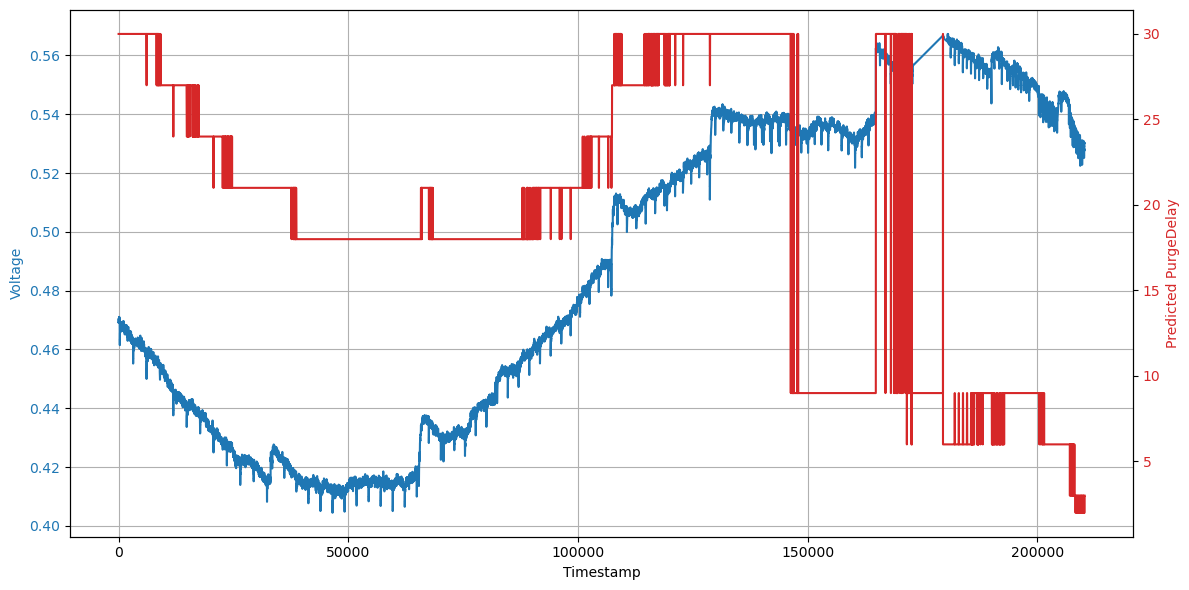

In [90]:




# Preprocess the 'Voltage' column of the modified dataset to match the scaling used during training
X_test_scaled2_pred = scaler2.transform(clean_purge_df_pred[['Timestamp', 'Voltage']].values)

# Create sequences for test data from the modified dataset similar to how it was done for training data
X_seq_test2_pred = []
for i in range(len(X_test_scaled2_pred) - lookback2 + 1):
    X_seq_test2_pred.append(X_test_scaled2_pred[i:i + lookback2])
X_seq_test2_pred = np.array(X_seq_test2_pred)

# Predict classes for the test data from the modified dataset
y_pred_test2_pred = np.argmax(model2.predict(X_seq_test2_pred), axis=-1)

# Inverse transform the predictions to get the original class labels
y_pred_test_original2_pred = encoder2.inverse_transform(y_pred_test2_pred)

# Add the predictions to the modified DataFrame
clean_purge_df_pred['PurgeDelay_Predicted_model2'] = np.nan  # Initialize the column with NaNs
clean_purge_df_pred['PurgeDelay_Predicted_model2'].iloc[lookback2 - 1:] = y_pred_test_original2_pred

# Create two subplots with shared x-axis (time) using the modified dataset
fig, ax1 = plt.subplots(figsize=(12,6))

# Plot 'Voltage' from the modified dataset on the first y-axis
color = 'tab:blue'
ax1.set_xlabel('Timestamp')
ax1.set_ylabel('Voltage', color=color)
ax1.plot(clean_purge_df_pred.index, clean_purge_df_pred['Voltage'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax1.grid(True)

# Create a second y-axis for the same x-axis (time)
ax2 = ax1.twinx()

# We already handled the x-label with ax1
ax2.set_ylabel('Predicted PurgeDelay', color='tab:red')  # we already handled the x-label with ax1
ax2.plot(clean_purge_df_pred.index, clean_purge_df_pred['PurgeDelay_Predicted_model2'], color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


In [82]:
print(clean_purge_df['Voltage'].describe())

count    191152.000000
mean          0.483991
std           0.019368
min           0.458086
25%           0.472440
50%           0.476943
75%           0.483695
max           0.540637
Name: Voltage, dtype: float64


<h4>Model 3

In [39]:

# Subset dataframe with desired features
data_test3 = clean_purge_df[["Timestamp", "Voltage", "TC 01", "TC 02", "cathodePD", "TemperatureDiff", "TC 03", "cathodeTD", "PurgeDelay"]]


# Encoding 'PurgeDelay'
encoder3 = LabelEncoder()
data_test3['PurgeDelay'] = encoder3.fit_transform(data_test3['PurgeDelay'])

# Splitting into features and target
X3 = data_test3[["Timestamp", "Voltage", "TC 01", "TC 02", "cathodePD", "TemperatureDiff", "TC 03", "cathodeTD"]].values
y3 = data_test3["PurgeDelay"].values

# Defining lookback period and creating sequences
lookback3 = 3
X_seq3 = []
y_seq3 = []

for i in range(len(X3) - lookback3):
    X_seq3.append(X3[i:i+lookback3])
    y_seq3.append(y3[i+lookback3])

# Convert to numpy arrays
X_seq3 = np.array(X_seq3)
y_seq3 = np.array(y_seq3)

# Get unique classes and their counts
unique3, counts3 = np.unique(y_seq3, return_counts=True)

# Find the class with the minimum count
min_class3 = min(counts3)

# Initialize arrays to store stratified data
X_stratified3 = np.empty((0, lookback3, X3.shape[1]))
y_stratified3 = np.empty((0,))

# Loop over classes
for cls in unique3:
    # Get indices of instances of this class
    indices3 = np.where(y_seq3 == cls)[0]

    # If the number of instances is more than the minimum class count, then undersample it
    if len(indices3) > min_class3:
        indices3 = np.random.choice(indices3, min_class3, replace=False)

    # Get the instances of this class
    X_cls3 = X_seq3[indices3]
    y_cls3 = y_seq3[indices3]

    # Append to stratified data
    X_stratified3 = np.append(X_stratified3, X_cls3, axis=0)
    y_stratified3 = np.append(y_stratified3, y_cls3, axis=0)

# Initialize stratified K-fold
n_folds3 = 5
skf3 = StratifiedKFold(n_splits=n_folds3, shuffle=True, random_state=42)

# Scaling features for the hold-out test set
scaler3 = MinMaxScaler()
X_stratified_scaled3 = scaler3.fit_transform(X_stratified3.reshape(-1, X3.shape[-1])).reshape(X_stratified3.shape)

# One-hot encoding 'PurgeDelay' for the hold-out test set
y_stratified_categorical3 = to_categorical(y_stratified3, num_classes=len(unique3))

# Initialize results
results3 = []
predictions3 = []  # List to store predictions for each fold

# Loop over the folds
for fold, (train_val, test) in enumerate(skf3.split(X_stratified3, y_stratified3)):
    print(f"Fold {fold + 1}:")
    # Split into training and validation sets
    X_train_val3, X_test3 = X_stratified3[train_val], X_stratified3[test]
    y_train_val3, y_test3 = y_stratified3[train_val], y_stratified3[test]

    # Further split training and validation sets
    X_train3, X_val3, y_train3, y_val3 = train_test_split(X_train_val3, y_train_val3, test_size=0.2, stratify=y_train_val3, random_state=42)

    # Apply SMOTE if imbalanced in training data
    class_dist3 = pd.Series(y_train3).value_counts()
    if class_dist3.min() / class_dist3.max() < 0.5:
        smote3 = SMOTE(random_state=42)
        X_train3, y_train3 = smote3.fit_resample(X_train3.reshape(X_train3.shape[0], -1), y_train3)
        X_train3 = X_train3.reshape(-1, lookback3, X3.shape[1])

    # Scaling features
    X_train_scaled3 = scaler3.transform(X_train3.reshape(-1, X_train3.shape[-1])).reshape(X_train3.shape)
    X_val_scaled3 = scaler3.transform(X_val3.reshape(-1, X_val3.shape[-1])).reshape(X_val3.shape)
    X_test_scaled3 = scaler3.transform(X_test3.reshape(-1, X_test3.shape[-1])).reshape(X_test3.shape)

    # One-hot encoding 'PurgeDelay'
    y_train_categorical3 = to_categorical(y_train3, num_classes=len(unique3))
    y_val_categorical3 = to_categorical(y_val3, num_classes=len(unique3))
    y_test_categorical3 = to_categorical(y_test3, num_classes=len(unique3))

    # LSTM model with Dropout and L2 regularization
    model3 = Sequential([
  LSTM(32, return_sequences=True,  
      kernel_regularizer=l1_l2(l1=0.01, l2=0.15),
      input_shape=(X_train_scaled3.shape[1], X_train_scaled3.shape[2])),
  BatchNormalization(),
  Dropout(0.7), 
  LSTM(32, kernel_regularizer=l1_l2(l1=0.01, l2=0.15)),
  BatchNormalization(),
  Dropout(0.7),
  Dense(len(unique3), activation='softmax', kernel_regularizer=l1_l2(l1=0.01, l2=0.15))
])


    # Compile the model
    optimizer3 = Adam(learning_rate=0.001)  # Decreased learning rate
    model3.compile(optimizer=optimizer3, loss='categorical_crossentropy', metrics=['accuracy'])

    # Early stopping and learning rate scheduler
    early_stop3 = EarlyStopping(monitor='val_loss', patience=30, verbose=1, mode='min', restore_best_weights=True)
    lr_scheduler3 = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=20, verbose=1, mode='min', min_lr=1e-6)

    # Train the model
    history3 = model3.fit(X_train_scaled3, y_train_categorical3, epochs=20,  # Increased number of epochs
                        validation_data=(X_val_scaled3, y_val_categorical3),
                        batch_size=64, callbacks=[early_stop3, lr_scheduler3], verbose=1)

    # Evaluate the model on the validation set
    score_val3 = model3.evaluate(X_val_scaled3, y_val_categorical3, verbose=1)
    print('Validation loss:', score_val3[0])
    print('Validation accuracy:', score_val3[1])

    # Predicted classes for the validation set
    y_pred_val3 = np.argmax(model3.predict(X_val_scaled3), axis=-1)

    # Calculate precision, recall, f1-score for the validation set
    precision_val3 = precision_score(y_val3, y_pred_val3, average='macro')
    recall_val3 = recall_score(y_val3, y_pred_val3, average='macro')
    f1_val3 = f1_score(y_val3, y_pred_val3, average='macro')

    print('Precision (validation set):', precision_val3)
    print('Recall (validation set):', recall_val3)
    print('F1-score (validation set):', f1_val3)

    # Append validation set results to the results list
    results3.append({
        'fold': fold + 1,
        'val_loss': score_val3[0],
        'val_accuracy': score_val3[1],
        'precision': precision_val3,
        'recall': recall_val3,
        'f1': f1_val3,
    })

    # Predict classes for the validation set and the hold-out test set
    y_pred_val3 = np.argmax(model3.predict(X_val_scaled3), axis=-1)
    y_pred_holdout3 = np.argmax(model3.predict(X_stratified_scaled3), axis=-1)

    # Inverse transform the predictions to get the original class labels
    y_pred_val_original3 = encoder3.inverse_transform(y_pred_val3)
    y_pred_holdout_original3 = encoder3.inverse_transform(y_pred_holdout3)

    # Store the predictions for each fold
    predictions3.append({
        'fold': fold + 1,
        'val_predictions': y_pred_val_original3,
        'holdout_predictions': y_pred_holdout_original3,
    })

# Convert results and predictions to DataFrames
results_df3 = pd.DataFrame(results3)
predictions_df3 = pd.DataFrame(predictions3)

print('Results:')
print(results_df3)
print('\nPredictions:')
print(predictions_df3)


C:\Users\Sahil\AppData\Local\Temp\ipykernel_20548\225851868.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test3['PurgeDelay'] = encoder3.fit_transform(data_test3['PurgeDelay'])


Fold 1:
Epoch 1/20
372/372 [==============================] - 4s 5ms/step - loss: 6.7473 - accuracy: 0.4437 - val_loss: 3.2038 - val_accuracy: 0.3820 - lr: 0.0010
Epoch 2/20
372/372 [==============================] - 1s 4ms/step - loss: 1.9336 - accuracy: 0.6949 - val_loss: 1.7473 - val_accuracy: 0.8549 - lr: 0.0010
Epoch 3/20
372/372 [==============================] - 1s 4ms/step - loss: 1.6675 - accuracy: 0.7295 - val_loss: 1.3634 - val_accuracy: 0.8477 - lr: 0.0010
Epoch 4/20
372/372 [==============================] - 1s 4ms/step - loss: 1.5333 - accuracy: 0.7479 - val_loss: 1.2440 - val_accuracy: 0.8877 - lr: 0.0010
Epoch 5/20
372/372 [==============================] - 1s 4ms/step - loss: 1.4338 - accuracy: 0.7608 - val_loss: 1.1711 - val_accuracy: 0.8554 - lr: 0.0010
Epoch 6/20
372/372 [==============================] - 1s 4ms/step - loss: 1.3538 - accuracy: 0.7720 - val_loss: 1.0333 - val_accuracy: 0.9628 - lr: 0.0010
Epoch 7/20
372/372 [==============================] - 1s 3ms/s

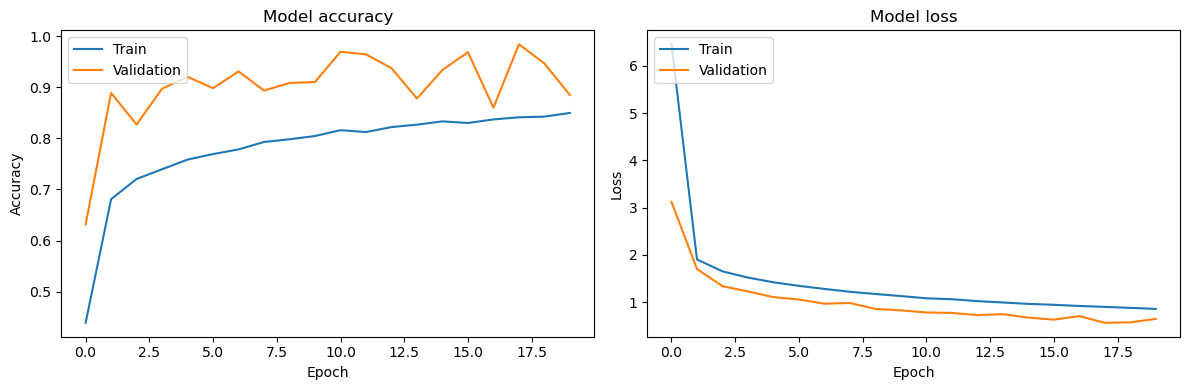

In [96]:



import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


In [97]:
# Evaluate the model on the test set
score_test3 = model3.evaluate(X_test_scaled3, y_test_categorical3, verbose=1)
print('Test loss:', score_test3[0])
print('Test accuracy:', score_test3[1])

# Predicted classes for the test set
y_pred_test3 = np.argmax(model3.predict(X_test_scaled3), axis=-1)

# Calculate precision, recall, f1-score for the test set
precision_test3 = precision_score(y_test3, y_pred_test3, average='macro')
recall_test3 = recall_score(y_test3, y_pred_test3, average='macro')
f1_test3 = f1_score(y_test3, y_pred_test3, average='macro')

print('Precision (test set):', precision_test3)
print('Recall (test set):', recall_test3)
print('F1-score (test set):', f1_test3)

# Append test set results to the results list
results3.append({
    'fold': fold + 1,
    'test_loss': score_test3[0],
    'test_accuracy': score_test3[1],
    'precision': precision_test3,
    'recall': recall_test3,
    'f1': f1_test3,
})


233/233 [==============================] - 0s 1ms/step - loss: 0.6398 - accuracy: 0.8860
Test loss: 0.6398382186889648
Test accuracy: 0.8860486745834351
233/233 [==============================] - 0s 945us/step
Precision (test set): 0.9048313391723913
Recall (test set): 0.886094674556213
F1-score (test set): 0.880638747370043


Text(0.5, 1.0, 'Training data')

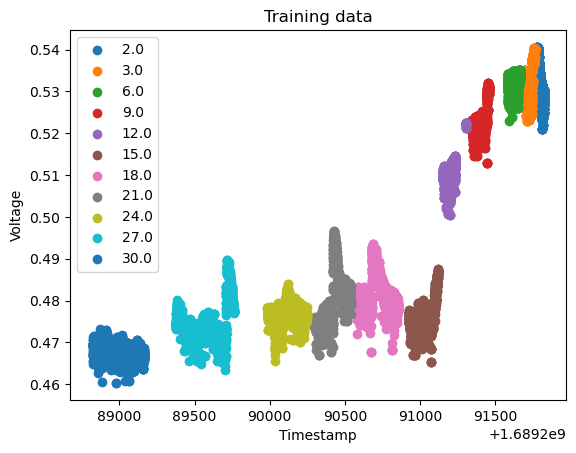

In [98]:
# Get original integer labels
y_train_int3 = np.argmax(y_train_categorical3, axis=-1)

# Inverse transform integers 
y_train_orig3 = encoder3.inverse_transform(y_train_int3)

# Inverse transform input data
X_train_orig3 = scaler3.inverse_transform(X_train_scaled3.reshape(-1, X3.shape[-1])).reshape(X_train_scaled3.shape)

# Scatter plot
plt.figure()
for c in np.unique(y_train_orig3):
    ix = np.where(y_train_orig3 == c)
    plt.scatter(X_train_orig3[ix, 0, 0], X_train_orig3[ix, 0, 1], label=c)
plt.legend()
plt.xlabel('Timestamp')  
plt.ylabel('Voltage')
plt.title('Training data')

In [100]:
# make predictions for the holdout set
y_pred_holdout3 = np.argmax(model3.predict(X_stratified_scaled3), axis=-1)

# Inverse transform the predictions to get the original class labels
y_pred_holdout_original3 = encoder3.inverse_transform(y_pred_holdout3)


1162/1162 [==============================] - 1s 995us/step


In [101]:
# Preprocess the 'Voltage' column to match the scaling used during training
X_test_scaled3 = scaler3.transform(clean_purge_df[["Timestamp", "Voltage", "TC 01", "TC 02", "cathodePD", "TemperatureDiff", "TC 03", "cathodeTD"]].values)

# Create sequences for test data similar to how it was done for training data
X_seq_test3 = []
for i in range(len(X_test_scaled3) - lookback3 + 1):
    X_seq_test3.append(X_test_scaled3[i:i + lookback3])
X_seq_test3 = np.array(X_seq_test3)

# Predict classes for the test data
y_pred_test3 = np.argmax(model3.predict(X_seq_test3), axis=-1)

# Inverse transform the predictions to get the original class labels
y_pred_test_original3 = encoder3.inverse_transform(y_pred_test3)

# Add the predictions to the DataFrame
clean_purge_df['PurgeDelay_Predicted_model3'] = np.nan  # Initialize the column with NaNs
clean_purge_df['PurgeDelay_Predicted_model3'].iloc[lookback3 - 1:] = y_pred_test_original3


5974/5974 [==============================] - 6s 984us/step


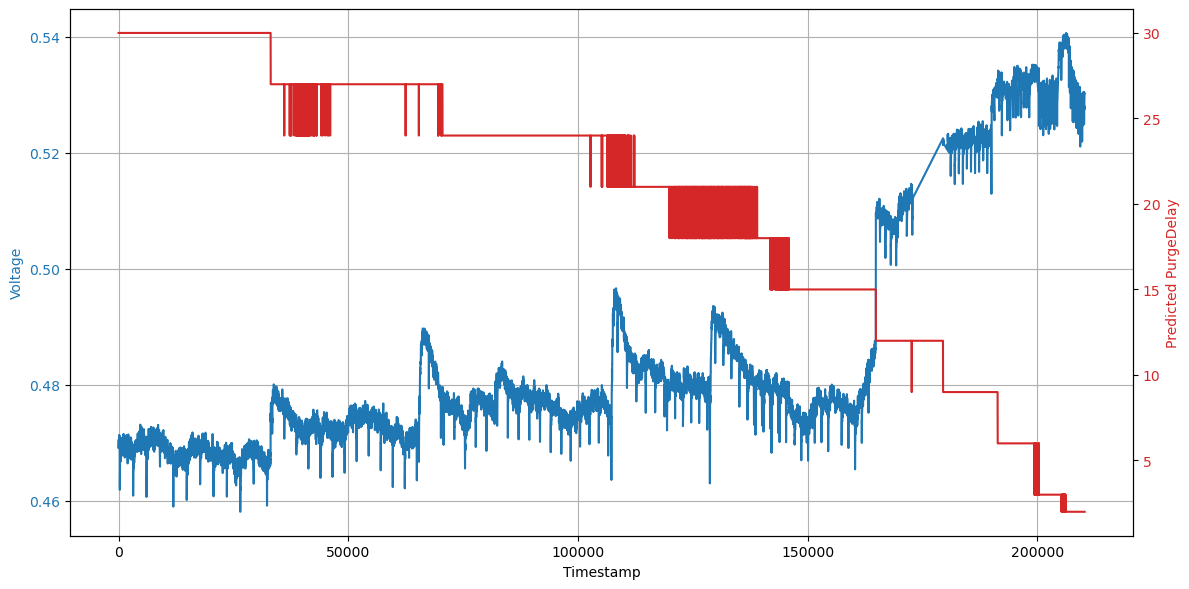

In [102]:

# Create two subplots with shared x-axis (time)
fig, ax1 = plt.subplots(figsize=(12,6))

# Plot 'Voltage' on the first y-axis
color = 'tab:blue'
ax1.set_xlabel('Timestamp')
ax1.set_ylabel('Voltage', color=color)
ax1.plot(clean_purge_df.index, clean_purge_df['Voltage'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax1.grid(True)

# Create a second y-axis for the same x-axis (time)
ax2 = ax1.twinx()

# We already handled the x-label with ax1
ax2.set_ylabel('Predicted PurgeDelay', color='tab:red')  # we already handled the x-label with ax1
ax2.plot(clean_purge_df.index, clean_purge_df['PurgeDelay_Predicted_model3'], color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


NameError: name 'scaler2' is not defined

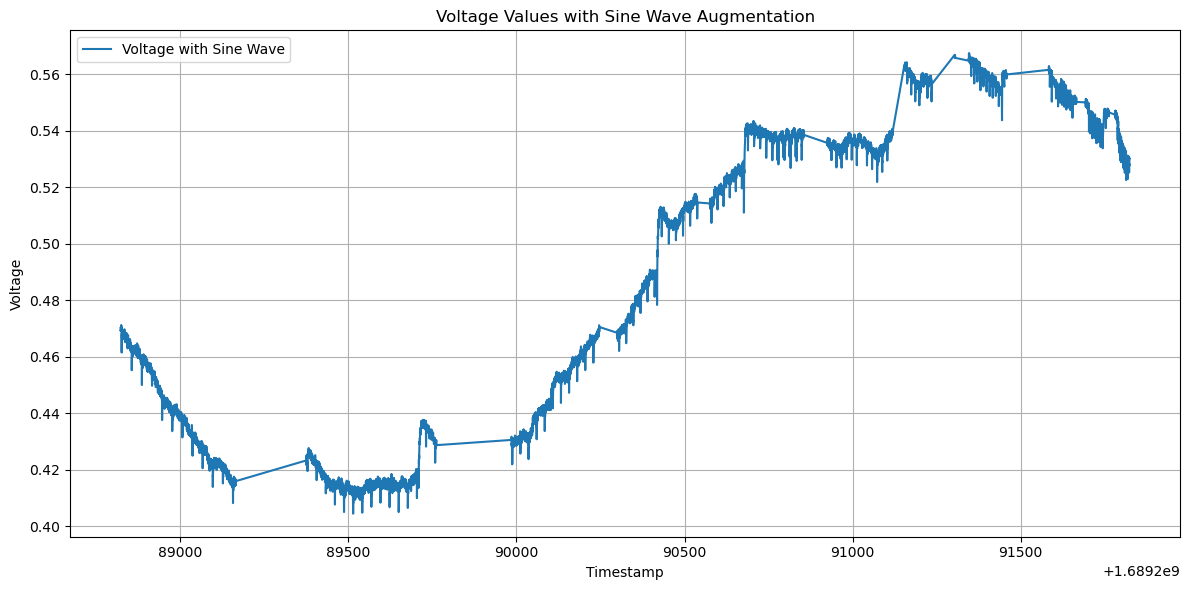

5974/5974 [==============================] - 6s 945us/step


C:\Users\Sahil\AppData\Local\Temp\ipykernel_20548\863162986.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test3_pred['PurgeDelay_Predicted_model3'].iloc[lookback3 - 1:] = y_pred_test_original3_pred


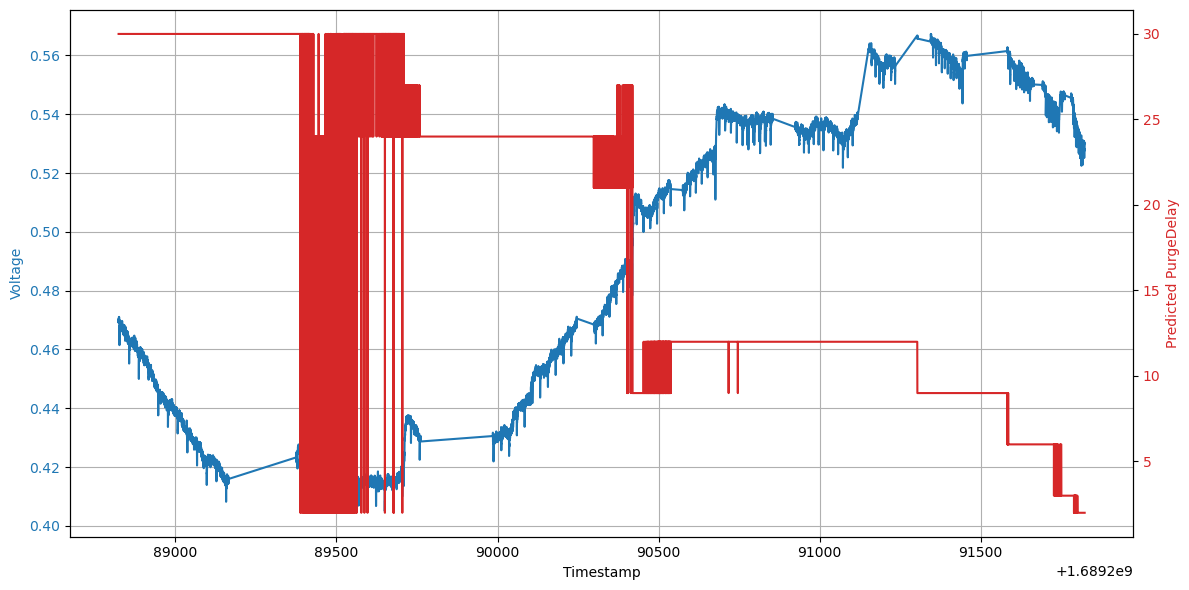

In [95]:
import numpy as np
import matplotlib.pyplot as plt

scaled_sin_wave = 0.06 * np.sin(np.linspace(-np.pi, np.pi, len(data_test3)))

# Add the scaled sine wave to the 'Voltage' column
data_test3_pred = data_test3.copy()
data_test3_pred['Voltage'] += scaled_sin_wave

# Plotting the 'Voltage' values from the sine wave-augmented dataset
plt.figure(figsize=(12,6))
plt.plot(data_test3_pred["Timestamp"], data_test3_pred['Voltage'], color='tab:blue', label='Voltage with Sine Wave')
plt.xlabel('Timestamp')
plt.ylabel('Voltage')
plt.title('Voltage Values with Sine Wave Augmentation')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Preprocess the 'Voltage' column of the modified dataset to match the scaling used during training
X_test_scaled3_pred = scaler3.transform(data_test3_pred[["Timestamp", "Voltage", "TC 01", "TC 02", "cathodePD", "TemperatureDiff", "TC 03", "cathodeTD"]].values)

# Create sequences for test data from the modified dataset similar to how it was done for training data
X_seq_test3_pred = []
for i in range(len(X_test_scaled3_pred) - lookback3 + 1):
    X_seq_test3_pred.append(X_test_scaled3_pred[i:i + lookback3])
X_seq_test3_pred = np.array(X_seq_test3_pred)

# Predict classes for the test data from the modified dataset
y_pred_test3_pred = np.argmax(model3.predict(X_seq_test3_pred), axis=-1)

# Inverse transform the predictions to get the original class labels
y_pred_test_original3_pred = encoder3.inverse_transform(y_pred_test3_pred)

# Add the predictions to the modified DataFrame
data_test3_pred['PurgeDelay_Predicted_model3'] = np.nan  # Initialize the column with NaNs
data_test3_pred['PurgeDelay_Predicted_model3'].iloc[lookback3 - 1:] = y_pred_test_original3_pred

# Create two subplots with shared x-axis (time) using the modified dataset
fig, ax1 = plt.subplots(figsize=(12,6))

# Plot 'Voltage' from the modified dataset on the first y-axis
color = 'tab:blue'
ax1.set_xlabel('Timestamp')
ax1.set_ylabel('Voltage', color=color)
ax1.plot(data_test3_pred["Timestamp"], data_test3_pred['Voltage'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax1.grid(True)

# Create a second y-axis for the same x-axis (time)
ax2 = ax1.twinx()

# We already handled the x-label with ax1
ax2.set_ylabel('Predicted PurgeDelay', color='tab:red')  # we already handled the x-label with ax1
ax2.plot(data_test3_pred["Timestamp"], data_test3_pred['PurgeDelay_Predicted_model3'], color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()
